## Data cleaning

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from pandas.plotting import scatter_matrix
import seaborn as sb

%store -r data_frame
%store -r list_of_columns
%store -r missing_values_above_80_percent
%store -r missing_values_below_10_percent 

#remove limit displaying rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### Delete columns and rows with missing values.

Removal of columns with more than 80% missing values.

In [130]:
data_frame = data_frame.drop(columns=missing_values_above_80_percent)
data_frame.head()

id                         listing_url       scrape_id last_scraped  \
0   2384   https://www.airbnb.com/rooms/2384  20220914061546   2022-09-14   
1   7126   https://www.airbnb.com/rooms/7126  20220914061546   2022-09-14   
2  10945  https://www.airbnb.com/rooms/10945  20220914061546   2022-09-14   
3  12140  https://www.airbnb.com/rooms/12140  20220914061546   2022-09-14   
4  24833  https://www.airbnb.com/rooms/24833  20220914061546   2022-09-14   

        source                                               name  \
0  city scrape                       Hyde Park - Walk to UChicago   
1  city scrape                Tiny Studio Apartment 94 Walk Score   
2  city scrape                              The Biddle House (#1)   
3  city scrape                           Lincoln Park Guest House   
4  city scrape  Prime LincolnPark 1 Block Fullerton Express L ...   

                                         description  \
0  You are invited to be the sole Airbnb guest in...   
1  A very small studio in a wonderful neighborhoo...   
2  Beautiful first floor apartment in Historic Ol...   
3  Bed and Breakfast license issued by the City o...   
4  Perfect private entrance apartment one block f...   

                               neighborhood_overview  \
0  The apartment is less than one block from beau...   
1  Ukrainian Village was just named "Hottest Neig...   
2                                                NaN   
3  The Guest House is in the heart of Chicago's m...   
4  Lincoln Park is a great neighborhood where peo...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/acf6b3c0-47f2...     2613   
1  https://a0.muscache.com/pictures/51073/16c81c7...    17928   
2  https://a0.muscache.com/pictures/58d1a420-a24b...    33004   
3  https://a0.muscache.com/pictures/55126/6a4f01b...    46734   
4  https://a0.muscache.com/pictures/ac17be6f-40bd...   101521   

                                   host_url          host_name  host_since  \
0    https://www.airbnb.com/users/show/2613            Rebecca  2008-08-29   
1   https://www.airbnb.com/users/show/17928              Sarah  2009-05-19   
2   https://www.airbnb.com/users/show/33004        At Home Inn  2009-08-21   
3   https://www.airbnb.com/users/show/46734  Sharon And Robert  2009-10-18   
4  https://www.airbnb.com/users/show/101521                Red  2010-03-31   

  host_location                                         host_about  \
0   Chicago, IL  My 2 bdrm apartment is a 2nd floor walk-up in ...   
1   Chicago, IL  We live in Chicago. We love to travel and see ...   
2   Chicago, IL  Hi, we're Bob and Liz Biddle, long time Chicag...   
3   Chicago, IL  Best in the city with long-time urban-dwelling...   
4   Chicago, IL  Travel is fun and exciting but can be hard on ...   

   host_response_time host_response_rate host_acceptance_rate  \
0      within an hour               100%                  97%   
1      within an hour               100%                  96%   
2      within an hour               100%                  99%   
3      within an hour               100%                  89%   
4  within a few hours                90%                  77%   

  host_is_superhost                                 host_thumbnail_url  \
0                 t  https://a0.muscache.com/im/pictures/user/8bb47...   
1                 t  https://a0.muscache.com/im/users/17928/profile...   
2                 t  https://a0.muscache.com/im/pictures/user/e23d4...   
3                 f  https://a0.muscache.com/im/users/46734/profile...   
4                 f  https://a0.muscache.com/im/users/101521/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/8bb47...          Hyde Park   
1  https://a0.muscache.com/im/users/17928/profile...  Ukrainian Village   
2  https://a0.muscache.com/im/pictures/user/e23d4...           Old Town   
3  https://a0.muscache.com/im/users/4

Removal of blank rows in columns where the missing value was less than 10%

In [131]:
data_frame = data_frame.dropna(subset=missing_values_below_10_percent)

In [132]:
data_frame.shape

(5722, 72)

After removing the missing data, 5722 rows and 72 columns remain.

In [133]:
data_frame.describe()

id     scrape_id       host_id  host_listings_count  \
count  5.722000e+03  5.722000e+03  5.722000e+03          5722.000000   
mean   1.823850e+17  2.022091e+13  1.507197e+08           300.825061   
std    2.888265e+17  0.000000e+00  1.437020e+08          1033.410992   
min    2.384000e+03  2.022091e+13  2.153000e+03             1.000000   
25%    2.987785e+07  2.022091e+13  2.800625e+07             1.000000   
50%    4.786159e+07  2.022091e+13  1.074344e+08             4.000000   
75%    5.718707e+17  2.022091e+13  2.430356e+08            18.000000   
max    7.149113e+17  2.022091e+13  4.778108e+08          4050.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                5722.000000  5722.000000  5722.000000   5722.000000   
mean                  338.379588    41.893914   -87.663783      4.519923   
std                  1139.895562     0.062039     0.044977      3.071889   
min                     1.000000    41.650640   -87.901560      1.000000   
25%                     2.000000    41.863507   -87.687792      2.000000   
50%                     6.000000    41.897823   -87.659170      4.000000   
75%                    27.000000    41.938038   -87.631996      6.000000   
max                  6605.000000    42.033620   -87.534090     16.000000   

          bedrooms         beds  minimum_nights  maximum_nights  \
count  5722.000000  5722.000000     5722.000000     5722.000000   
mean      1.875393     2.349528       13.328207      648.540196   
std       1.139014     1.784929       43.400135      475.750359   
min       1.000000     1.000000        1.000000        1.000000   
25%       1.000000     1.000000        2.000000      149.250000   
50%       2.000000     2.000000        2.000000      365.000000   
75%       2.000000     3.000000       32.000000     1125.000000   
max      12.000000    20.000000     1125.000000     1125.000000   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
count             5722.000000             5722.000000             5722.000000   
mean                14.832226               63.054002              822.465921   
std                 54.337958              188.154185              447.104026   
min                  1.000000                1.000000                1.000000   
25%                  2.000000                2.000000              365.000000   
50%                  2.000000                3.000000             1125.000000   
75%                 32.000000               32.000000             1125.000000   
max               1125.000000             1125.000000             1125.000000   

       maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
count            5.722000e+03             5722.000000            5.722000e+03   
mean             3.378606e+06               60.974956            2.636483e+06   
std              8.510854e+07              182.296170            6.824100e+07   
min              2.000000e+00                1.000000            2.000000e+00   
25%              3.650000e+02                2.000000            3.650000e+02   
50%              1.125000e+03                2.800000            1.125000e+03   
75%              1.125000e+03               32.000000            1.125000e+03   
max              2.147484e+09             1125.000000            2.118332e+09   

       availability_30  availability_60  availability_90  availability_365  \
count      5722.000000      5722.000000      5722.000000       5722.000000   
mean         11.461028        30.198357        51.967669        212.767913   
std           9.333101        19.331332        28.867650        125.569926   
min           0.000000         0.000000         0.000000          0.000000   
25%           3.000000        13.000000        32.000000         86.000000   
50%          10.000000        33.000000        60.000000        243.000000   
75%          19.000000        47.000000        75.750000        335.00000

In [134]:
data_frame.head()

id                         listing_url       scrape_id last_scraped  \
0   2384   https://www.airbnb.com/rooms/2384  20220914061546   2022-09-14   
1   7126   https://www.airbnb.com/rooms/7126  20220914061546   2022-09-14   
2  10945  https://www.airbnb.com/rooms/10945  20220914061546   2022-09-14   
3  12140  https://www.airbnb.com/rooms/12140  20220914061546   2022-09-14   
4  24833  https://www.airbnb.com/rooms/24833  20220914061546   2022-09-14   

        source                                               name  \
0  city scrape                       Hyde Park - Walk to UChicago   
1  city scrape                Tiny Studio Apartment 94 Walk Score   
2  city scrape                              The Biddle House (#1)   
3  city scrape                           Lincoln Park Guest House   
4  city scrape  Prime LincolnPark 1 Block Fullerton Express L ...   

                                         description  \
0  You are invited to be the sole Airbnb guest in...   
1  A very small studio in a wonderful neighborhoo...   
2  Beautiful first floor apartment in Historic Ol...   
3  Bed and Breakfast license issued by the City o...   
4  Perfect private entrance apartment one block f...   

                               neighborhood_overview  \
0  The apartment is less than one block from beau...   
1  Ukrainian Village was just named "Hottest Neig...   
2                                                NaN   
3  The Guest House is in the heart of Chicago's m...   
4  Lincoln Park is a great neighborhood where peo...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/acf6b3c0-47f2...     2613   
1  https://a0.muscache.com/pictures/51073/16c81c7...    17928   
2  https://a0.muscache.com/pictures/58d1a420-a24b...    33004   
3  https://a0.muscache.com/pictures/55126/6a4f01b...    46734   
4  https://a0.muscache.com/pictures/ac17be6f-40bd...   101521   

                                   host_url          host_name  host_since  \
0    https://www.airbnb.com/users/show/2613            Rebecca  2008-08-29   
1   https://www.airbnb.com/users/show/17928              Sarah  2009-05-19   
2   https://www.airbnb.com/users/show/33004        At Home Inn  2009-08-21   
3   https://www.airbnb.com/users/show/46734  Sharon And Robert  2009-10-18   
4  https://www.airbnb.com/users/show/101521                Red  2010-03-31   

  host_location                                         host_about  \
0   Chicago, IL  My 2 bdrm apartment is a 2nd floor walk-up in ...   
1   Chicago, IL  We live in Chicago. We love to travel and see ...   
2   Chicago, IL  Hi, we're Bob and Liz Biddle, long time Chicag...   
3   Chicago, IL  Best in the city with long-time urban-dwelling...   
4   Chicago, IL  Travel is fun and exciting but can be hard on ...   

   host_response_time host_response_rate host_acceptance_rate  \
0      within an hour               100%                  97%   
1      within an hour               100%                  96%   
2      within an hour               100%                  99%   
3      within an hour               100%                  89%   
4  within a few hours                90%                  77%   

  host_is_superhost                                 host_thumbnail_url  \
0                 t  https://a0.muscache.com/im/pictures/user/8bb47...   
1                 t  https://a0.muscache.com/im/users/17928/profile...   
2                 t  https://a0.muscache.com/im/pictures/user/e23d4...   
3                 f  https://a0.muscache.com/im/users/46734/profile...   
4                 f  https://a0.muscache.com/im/users/101521/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/8bb47...          Hyde Park   
1  https://a0.muscache.com/im/users/17928/profile...  Ukrainian Village   
2  https://a0.muscache.com/im/pictures/user/e23d4...           Old Town   
3  https://a0.muscache.com/im/users/4

Updating lists of columns of a given type after deleting NaN values

In [135]:
int_columns = [*data_frame.select_dtypes(include=['int'])]
float_columns = [*data_frame.select_dtypes(include=['float'])]
object_columns = [*data_frame.select_dtypes(include=['object'])]

### Verify that all columns have the correct types

In [136]:
data_frame[['host_response_rate','price','host_acceptance_rate']].head()


host_response_rate    price host_acceptance_rate
0               100%  $110.00                  97%
1               100%   $91.00                  96%
2               100%  $157.00                  99%
3               100%  $329.00                  89%
4                90%   $86.00                  77%

In [137]:
'host_response_rate' in object_columns, 'price' in object_columns, 'host_acceptance_rate' in object_columns

(True, True, True)

The above columns should be cleared of "%" and $ signs, because they were incorrectly qualified as 'object'

In [138]:
data_frame.price = data_frame.price.apply(lambda x: x.replace('$',''))
data_frame.price = data_frame.price.apply(lambda x: x.replace(',',''))
data_frame.price = pd.to_numeric(data_frame.price, errors='coerce')
data_frame.price.describe()

count     5722.000000
mean       219.076896
std        278.169271
min         18.000000
25%         96.000000
50%        156.000000
75%        249.000000
max      10000.000000
Name: price, dtype: float64

The 'price' column has been cleaned up and its type changed to float64

In [139]:
data_frame.host_response_rate = data_frame.host_response_rate.str.replace('%','')
data_frame.host_response_rate = data_frame.host_response_rate.astype(float)/100

data_frame.host_acceptance_rate = data_frame.host_acceptance_rate.str.replace('%','')
data_frame.host_acceptance_rate = data_frame.host_acceptance_rate.astype(float)/100

In [140]:
data_frame[['host_response_rate','price','host_acceptance_rate']].dtypes

host_response_rate      float64
price                   float64
host_acceptance_rate    float64
dtype: object

Removed the '%' signs and changed the other two columns to float, reflecting percentages to decimals

### Check where there are still missing values in object columns:

In [141]:
object_columns = [*data_frame.select_dtypes(include=['object'])]

In [142]:
missing_values = {}

def missing_values_check(columns_to_check):
    #check if missing values dcit is empty
    missing_values.clear()
    
    for index in columns_to_check:
        if data_frame[index].isna().sum() > 0:
            missing_values[index] = data_frame[index].isna().sum()
    
    if len(missing_values) == 0:
        print ('There are no missing values ​​in the following columns:' + f"{columns_to_check}")
    else:
        print('In: '+'\n' +f'{columns_to_check}'+'\n\n'+f' there are followings missing values: '+ '\n\n'+f'{missing_values}')

missing_values_check(object_columns)

In: 
['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']

 there are followings missing values: 

{'neighborhood_overview': 1723, 'host_location': 842, 'host_about': 1769, 'host_response_time': 191, 'neighbourhood': 1723, 'first_review': 934, 'last_review': 934, 'license': 756}


In [143]:
missing_values_col_indexes = list(missing_values.keys())
data_frame[missing_values_col_indexes].dtypes

neighborhood_overview    object
host_location            object
host_about               object
host_response_time       object
neighbourhood            object
first_review             object
last_review              object
license                  object
dtype: object

Missing values ​​should be supplemented, e.g. with average values ​​or the most numerous categorical ones

In [144]:
data_frame[missing_values_col_indexes].head()

neighborhood_overview host_location  \
0  The apartment is less than one block from beau...   Chicago, IL   
1  Ukrainian Village was just named "Hottest Neig...   Chicago, IL   
2                                                NaN   Chicago, IL   
3  The Guest House is in the heart of Chicago's m...   Chicago, IL   
4  Lincoln Park is a great neighborhood where peo...   Chicago, IL   

                                          host_about  host_response_time  \
0  My 2 bdrm apartment is a 2nd floor walk-up in ...      within an hour   
1  We live in Chicago. We love to travel and see ...      within an hour   
2  Hi, we're Bob and Liz Biddle, long time Chicag...      within an hour   
3  Best in the city with long-time urban-dwelling...      within an hour   
4  Travel is fun and exciting but can be hard on ...  within a few hours   

                      neighbourhood first_review last_review  \
0  Chicago, Illinois, United States   2015-01-09  2022-09-09   
1  Chicago, Illinois, United States   2009-07-03  2022-08-28   
2                               NaN   2014-04-28  2022-08-23   
3  Chicago, Illinois, United States   2015-06-29  2022-09-12   
4  Chicago, Illinois, United States   2010-05-24  2022-04-23   

                     license  
0               R17000015609  
1               R21000075737  
2                    2209984  
3               R20000055258  
4  City registration pending

Most of the missing values ​​are contained in the 'object' type. Columns: host_location, host_response_time, neighborhood, will be filled with the most numerous categories. In the remaining object type columns we will replace NaN with the string 'no info'. From the point of view of further analysis, the missing description 'host_about' will probably not be a problem, but it will be disadvantageous for us to remove 1769 records including NaN for this reason.

In [145]:
to_fill_list = ['host_location', 'host_response_time', 'neighbourhood']

A function that fills the columns in the list above with the most common values:

In [146]:
def fill_missing(col_name):
    result = data_frame.groupby(col_name)[col_name].count().rename('count')
    result_df = pd.DataFrame(result)
    result_df = result_df.reset_index().sort_values(by=['count'],ascending=False)
    to_fill = result_df[col_name].iloc[0]
    data_frame[col_name] = data_frame[col_name].fillna(value=to_fill)
    
for col in to_fill_list:
    fill_missing(col)



Checking if columns containing NaN values ​​have been completed:

In [147]:

missing_values_check(to_fill_list)

There are no missing values ​​in the following columns:['host_location', 'host_response_time', 'neighbourhood']


Rechecking for missing object columns

In [148]:
missing_values_check(object_columns)

In: 
['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']

 there are followings missing values: 

{'neighborhood_overview': 1723, 'host_about': 1769, 'first_review': 934, 'last_review': 934, 'license': 756}


Filling other object columns with 'no_info' values

In [149]:
def fill_nan_to_no_info(col_name):
    fill_str = 'no_info'
    data_frame[col_name] = data_frame[col_name].fillna(value=fill_str)

for col in object_columns:
    fill_nan_to_no_info(col)

Rechecking for missing object columns

In [150]:
missing_values_check(object_columns)

There are no missing values ​​in the following columns:['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']


### Check where there are still missing values in object columns:

In [151]:
num_columns = [*data_frame.select_dtypes(include=['float','int'])]

In [152]:
missing_values_check(num_columns)

In: 
['id', 'scrape_id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

 there are followings missing values: 

{'host_response_rate': 191, 'revi

In [153]:
missing_values_col_indexes = list(missing_values.keys())
missing_values_col_indexes
#data_frame[missing_values_col_indexes].max(), data_frame[missing_values_col_indexes].mean()

['host_response_rate',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

Supplementing the NaN values ​​in the numerical columns with average values

In [154]:
def fill_nan_with_mean_value(col_to_fill):
    mean = data_frame[col_to_fill].mean().round(2)
    data_frame[col_to_fill] = data_frame[col_to_fill].fillna(value=mean)
    nan_in_col = data_frame[col_to_fill].isna().sum()
    
    if nan_in_col == 0:
        print('Value completion for NaN rows in '+f'{col_to_fill}'+' to value: '+'\n'+f'{mean}' +' was successful, you have: '+f'{nan_in_col}'+' records to fill')
    else:
        print('There is still something to complete in ' + f'{nan_in_col}'+' records')

for col in missing_values_col_indexes:
    fill_nan_with_mean_value(col)

Value completion for NaN rows in host_response_rate to value: 
0.98 was successful, you have: 0 records to fill
Value completion for NaN rows in review_scores_rating to value: 
4.73 was successful, you have: 0 records to fill
Value completion for NaN rows in review_scores_accuracy to value: 
4.79 was successful, you have: 0 records to fill
Value completion for NaN rows in review_scores_cleanliness to value: 
4.73 was successful, you have: 0 records to fill
Value completion for NaN rows in review_scores_checkin to value: 
4.85 was successful, you have: 0 records to fill
Value completion for NaN rows in review_scores_communication to value: 
4.84 was successful, you have: 0 records to fill
Value completion for NaN rows in review_scores_location to value: 
4.75 was successful, you have: 0 records to fill
Value completion for NaN rows in review_scores_value to value: 
4.67 was successful, you have: 0 records to fill
Value completion for NaN rows in reviews_per_month to value: 
2.06 was suc

### Final check if there are any NaN values ​​in the set

In [155]:
missing_values_check(data_frame.columns)

There are no missing values ​​in the following columns:Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 

Poszukujemy odstających wartości

In [156]:
data_frame[num_columns].describe()

id     scrape_id       host_id  host_response_rate  \
count  5.722000e+03  5.722000e+03  5.722000e+03         5722.000000   
mean   1.823850e+17  2.022091e+13  1.507197e+08            0.980297   
std    2.888265e+17  0.000000e+00  1.437020e+08            0.079349   
min    2.384000e+03  2.022091e+13  2.153000e+03            0.000000   
25%    2.987785e+07  2.022091e+13  2.800625e+07            1.000000   
50%    4.786159e+07  2.022091e+13  1.074344e+08            1.000000   
75%    5.718707e+17  2.022091e+13  2.430356e+08            1.000000   
max    7.149113e+17  2.022091e+13  4.778108e+08            1.000000   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
count           5722.000000          5722.000000                5722.000000   
mean               0.912438           300.825061                 338.379588   
std                0.181050          1033.410992                1139.895562   
min                0.000000             1.000000                   1.000000   
25%                0.930000             1.000000                   2.000000   
50%                0.980000             4.000000                   6.000000   
75%                1.000000            18.000000                  27.000000   
max                1.000000          4050.000000                6605.000000   

          latitude    longitude  accommodates     bedrooms         beds  \
count  5722.000000  5722.000000   5722.000000  5722.000000  5722.000000   
mean     41.893914   -87.663783      4.519923     1.875393     2.349528   
std       0.062039     0.044977      3.071889     1.139014     1.784929   
min      41.650640   -87.901560      1.000000     1.000000     1.000000   
25%      41.863507   -87.687792      2.000000     1.000000     1.000000   
50%      41.897823   -87.659170      4.000000     2.000000     2.000000   
75%      41.938038   -87.631996      6.000000     2.000000     3.000000   
max      42.033620   -87.534090     16.000000    12.000000    20.000000   

              price  minimum_nights  maximum_nights  minimum_minimum_nights  \
count   5722.000000     5722.000000     5722.000000             5722.000000   
mean     219.076896       13.328207      648.540196               14.832226   
std      278.169271       43.400135      475.750359               54.337958   
min       18.000000        1.000000        1.000000                1.000000   
25%       96.000000        2.000000      149.250000                2.000000   
50%      156.000000        2.000000      365.000000                2.000000   
75%      249.000000       32.000000     1125.000000               32.000000   
max    10000.000000     1125.000000     1125.000000             1125.000000   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
count             5722.000000             5722.000000            5.722000e+03   
mean                63.054002              822.465921            3.378606e+06   
std                188.154185              447.104026            8.510854e+07   
min                  1.000000                1.000000            2.000000e+00   
25%                  2.000000              365.000000            3.650000e+02   
50%                  3.000000             1125.000000            1.125000e+03   
75%                 32.000000             1125.000000            1.125000e+03   
max               1125.000000             1125.000000            2.147484e+09   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
count             5722.000000            5.722000e+03      5722.000000   
mean                60.974956            2.636483e+06        11.461028   
std                182.296170            6.824100e+07         9.333101   
min                  1.000000            2.000000e+00         0.000000   
25%                  2.000000            3.650000e+02         3.000000   
50%                  2.800000            1.125000e+03        10.000000   
75%                 32.000000

### Analysis of outliers in numerical columns

analiza przed czyszczeniem

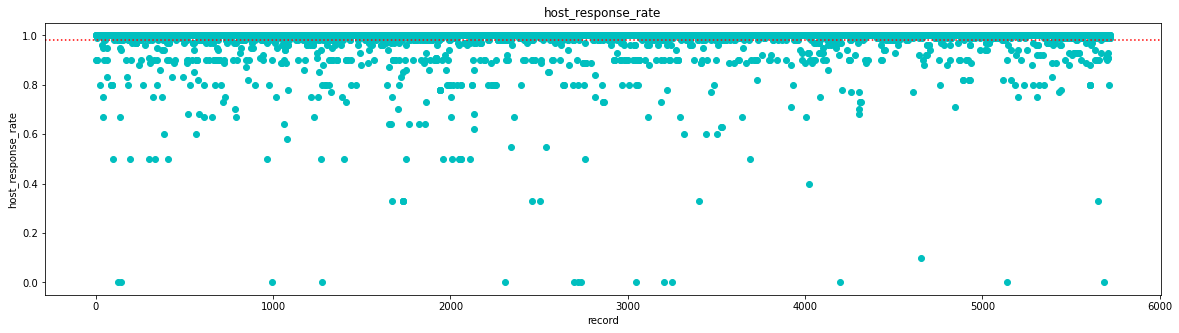

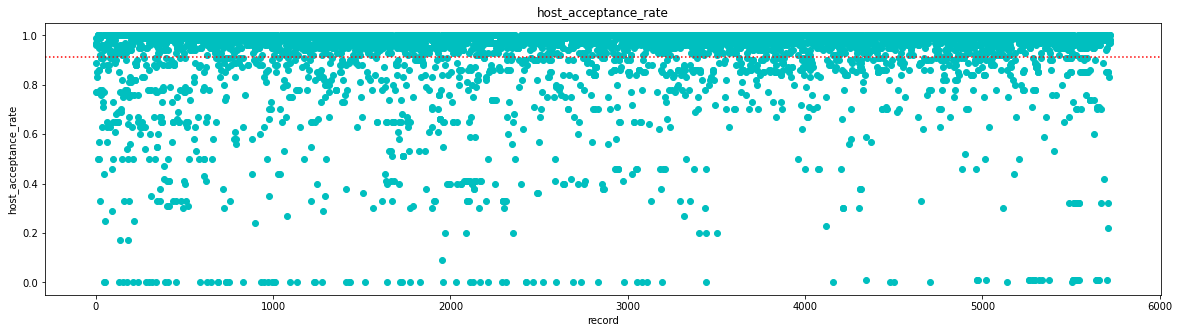

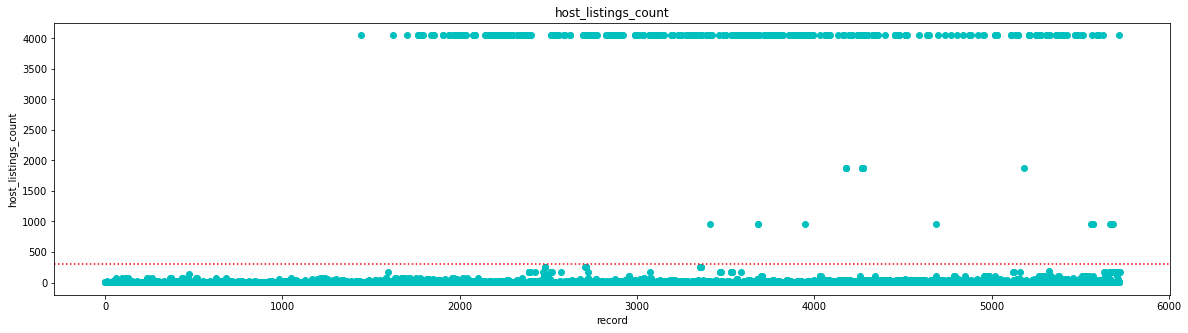

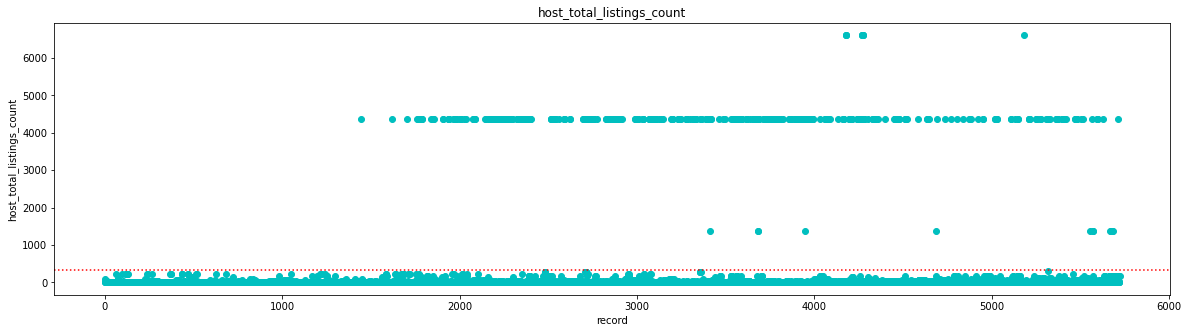

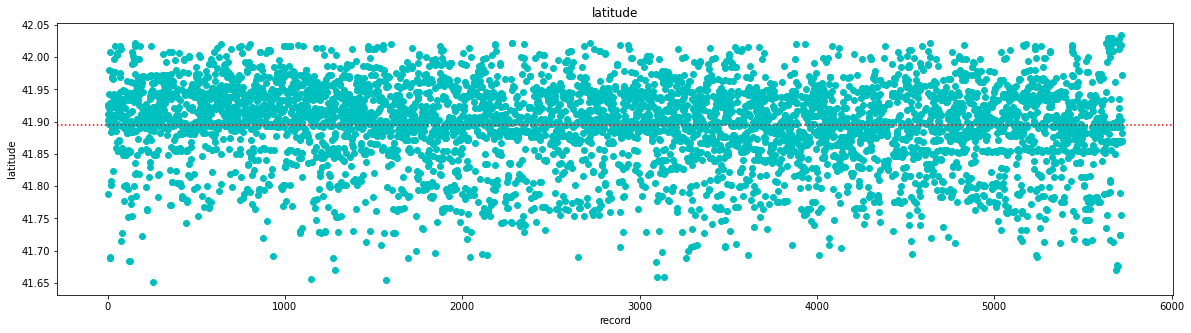

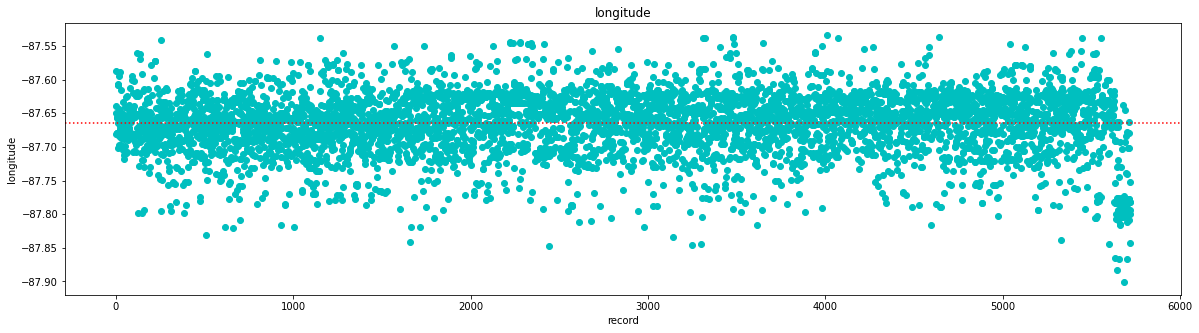

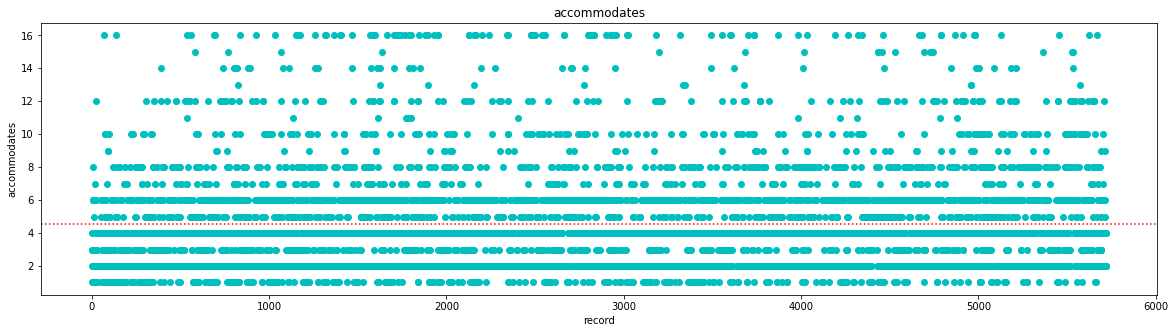

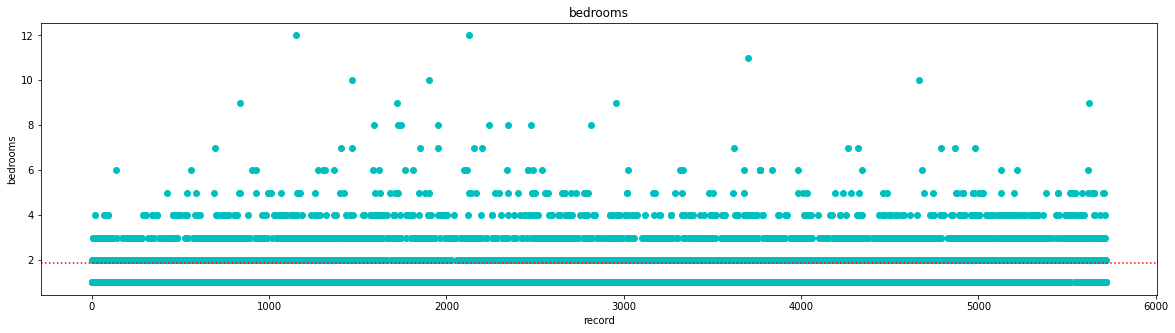

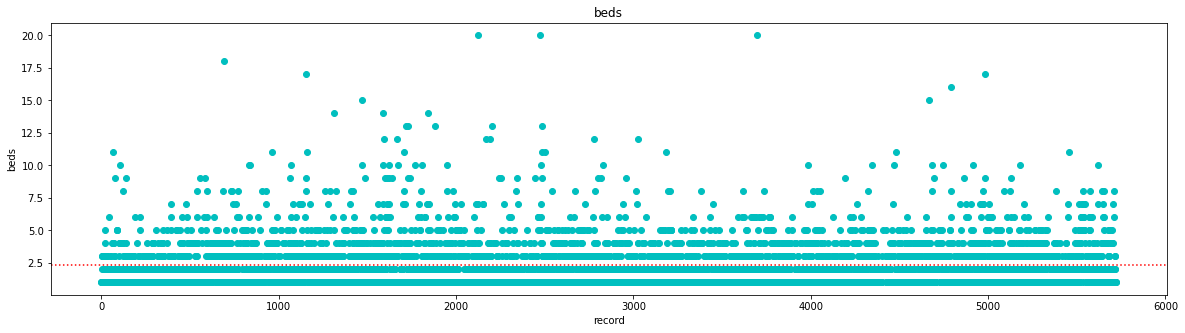

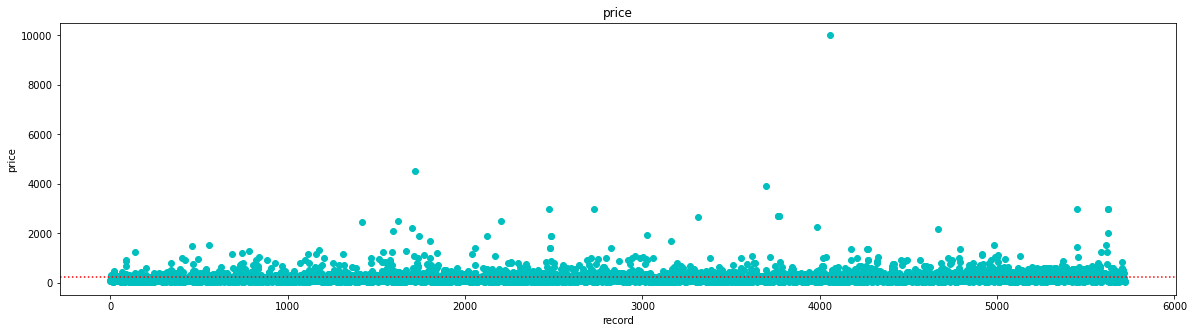

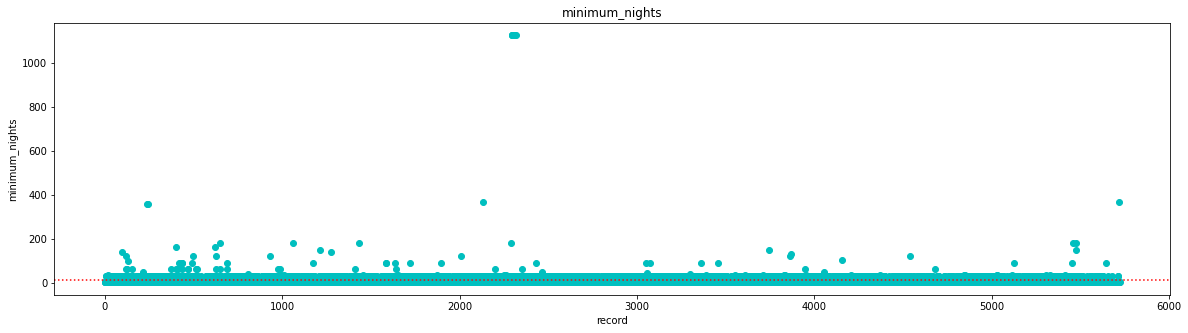

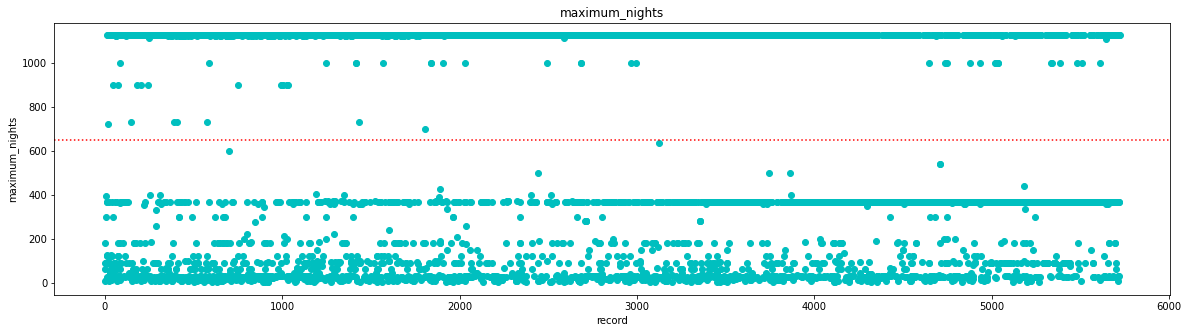

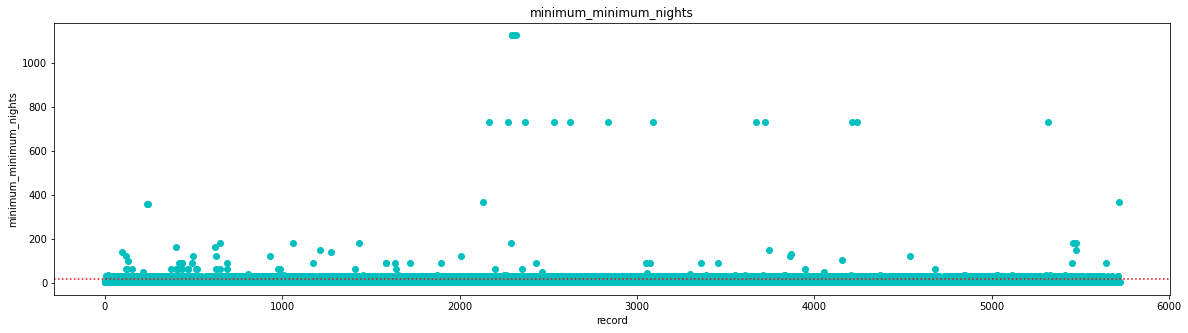

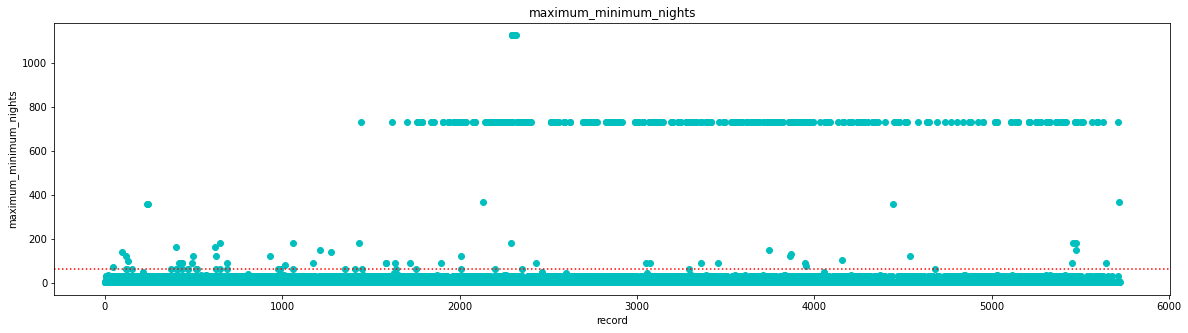

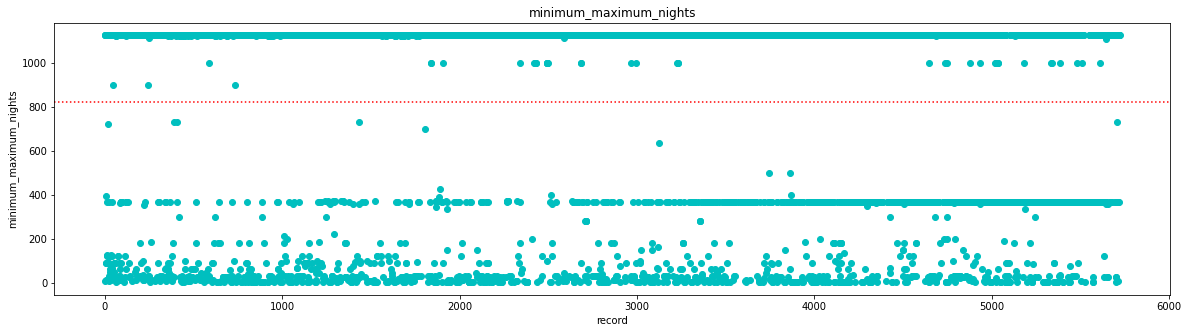

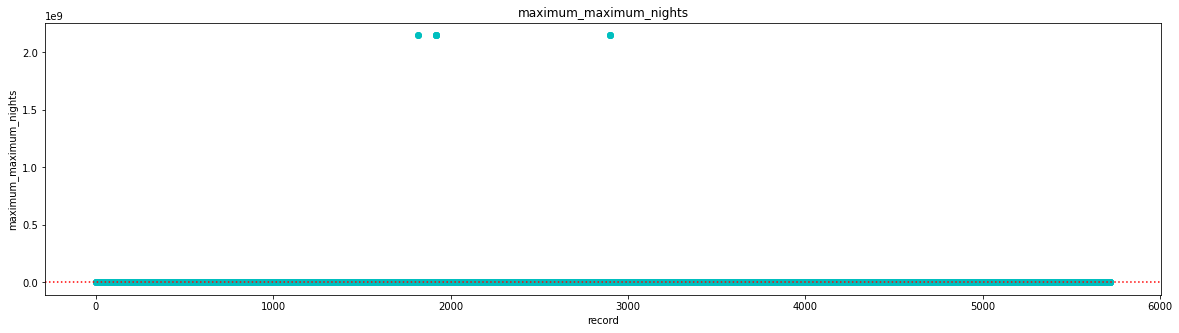

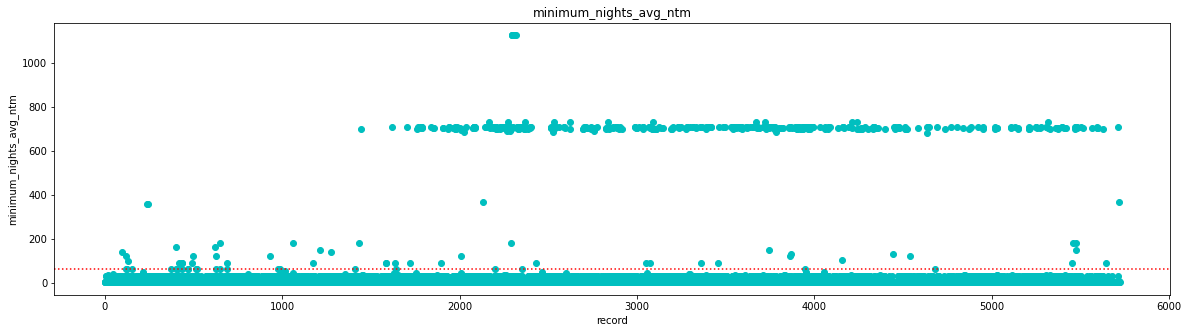

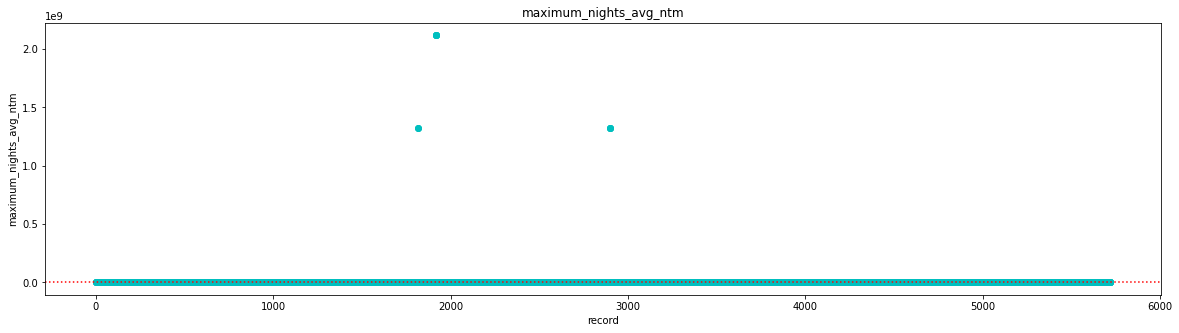

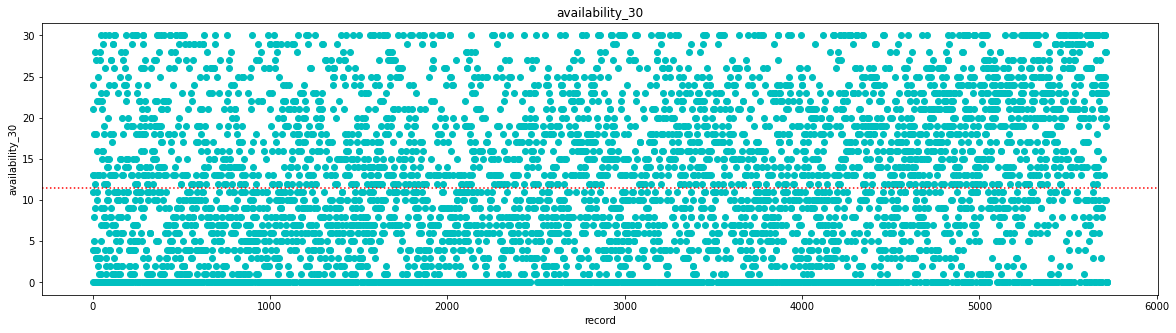

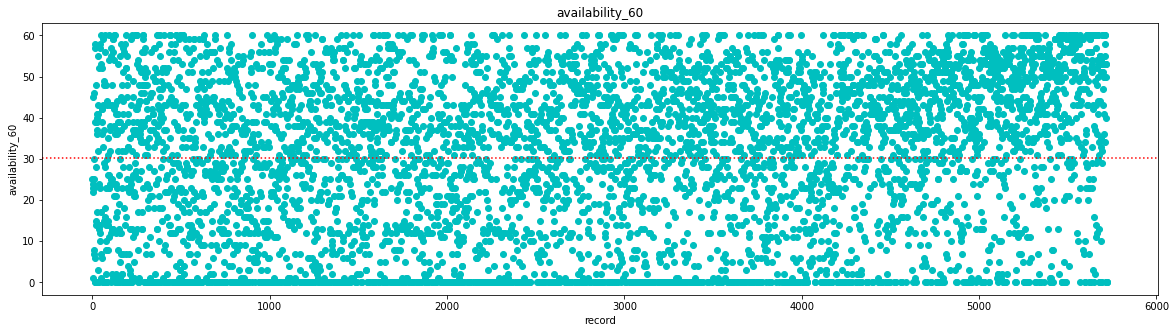

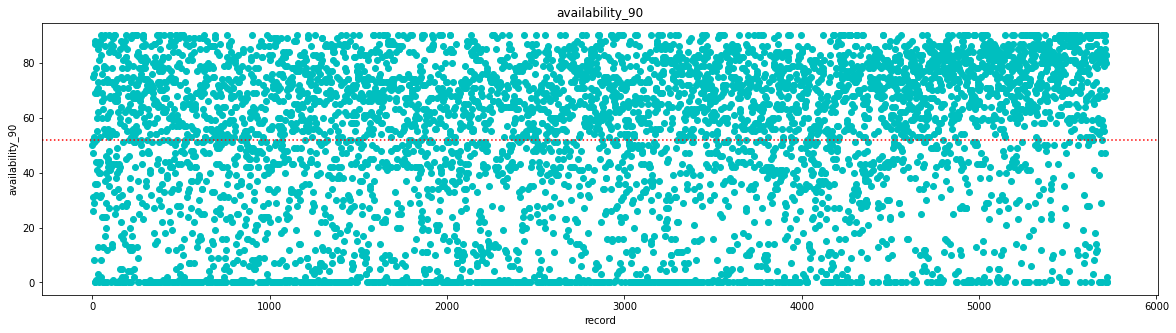

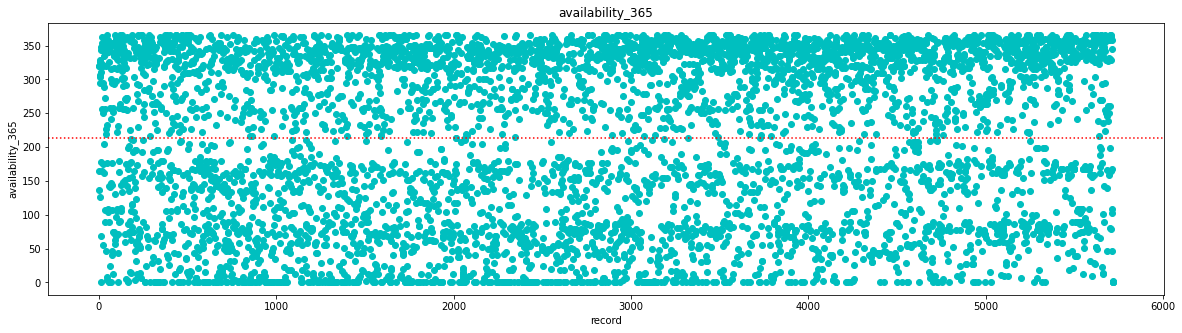

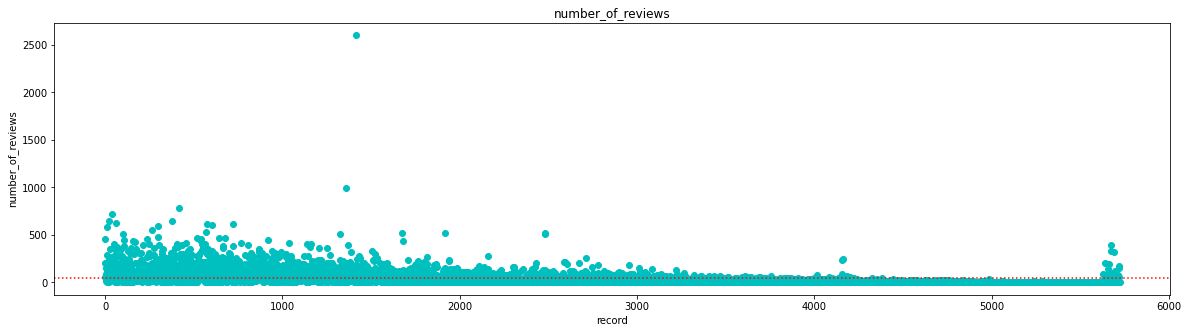

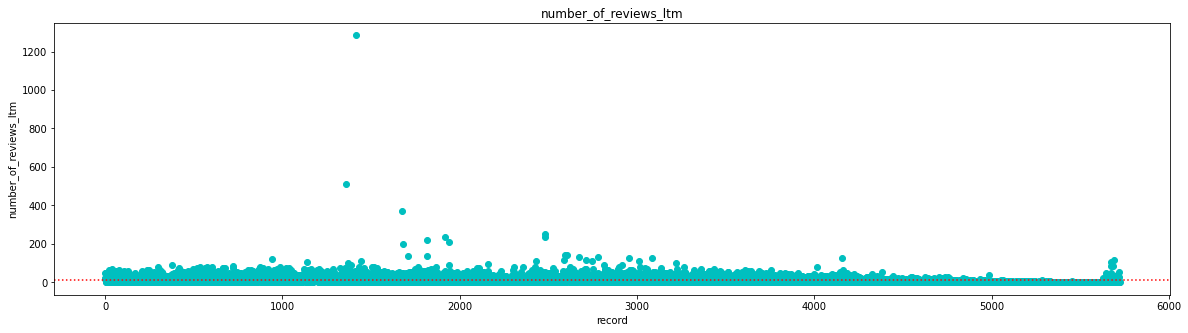

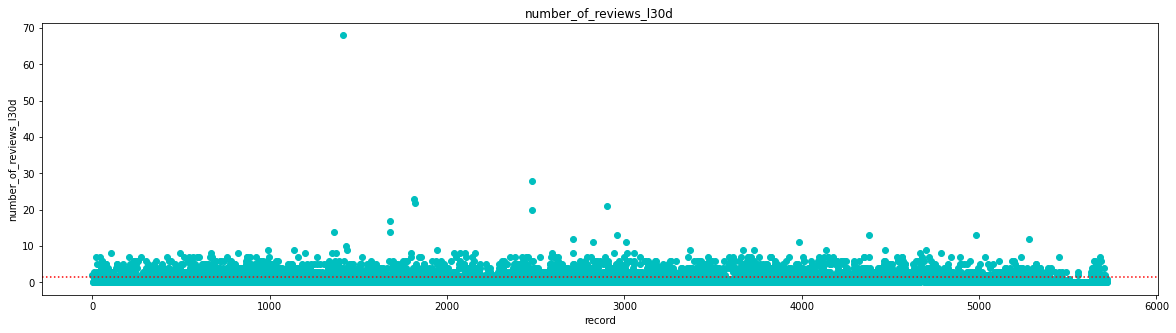

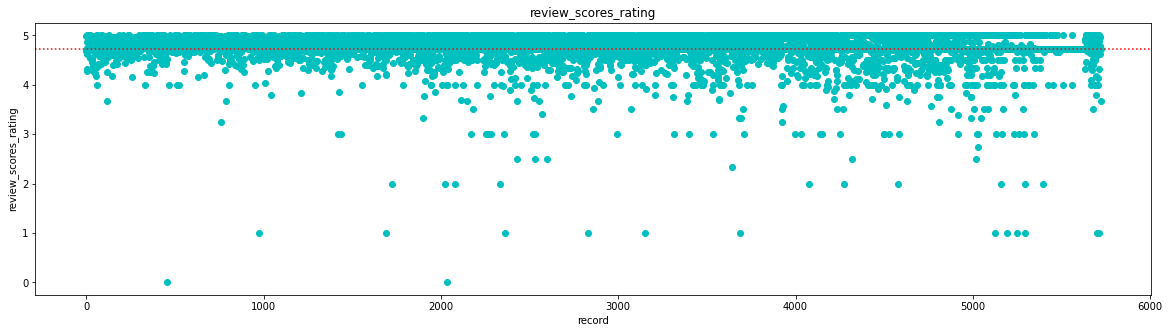

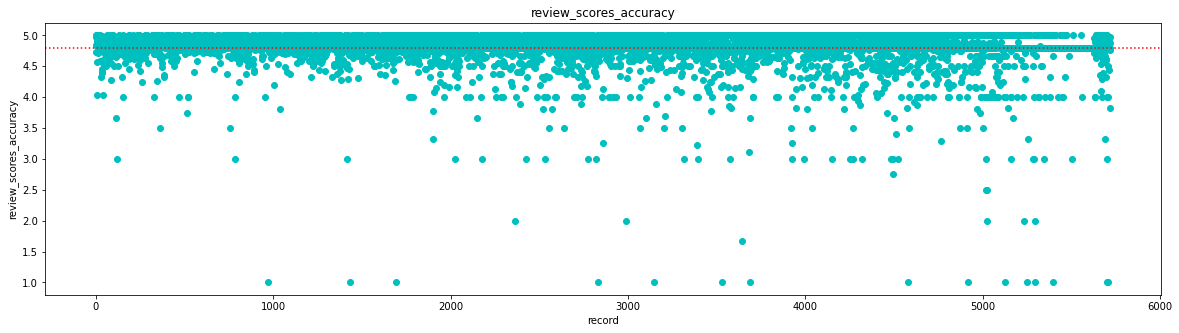

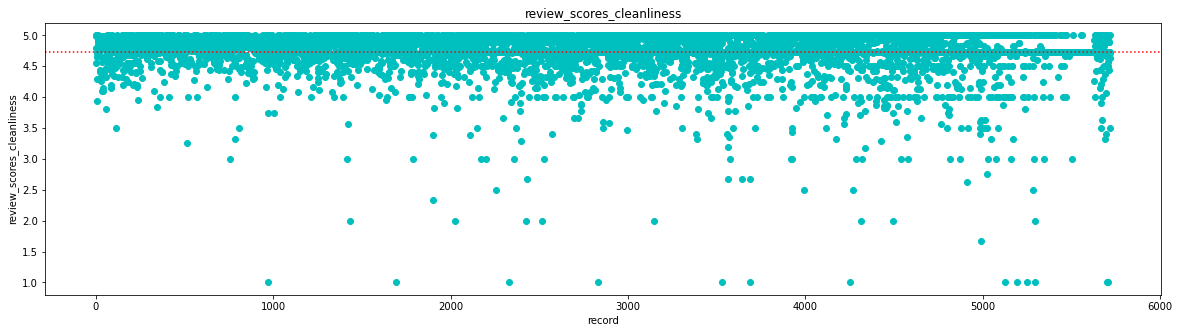

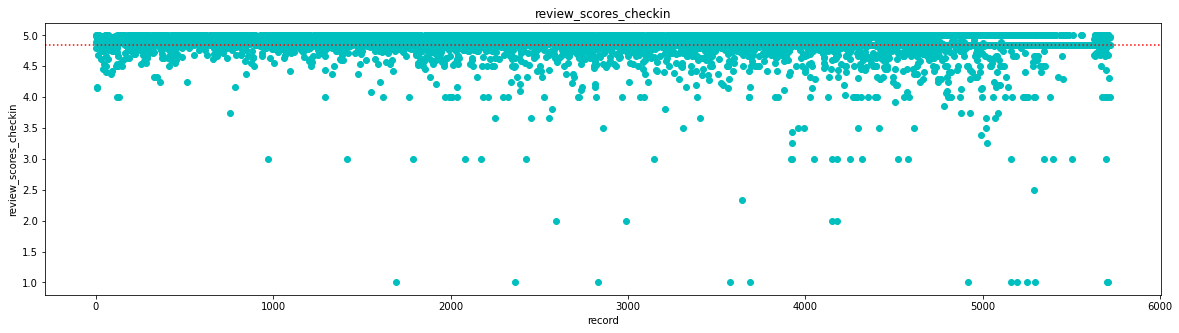

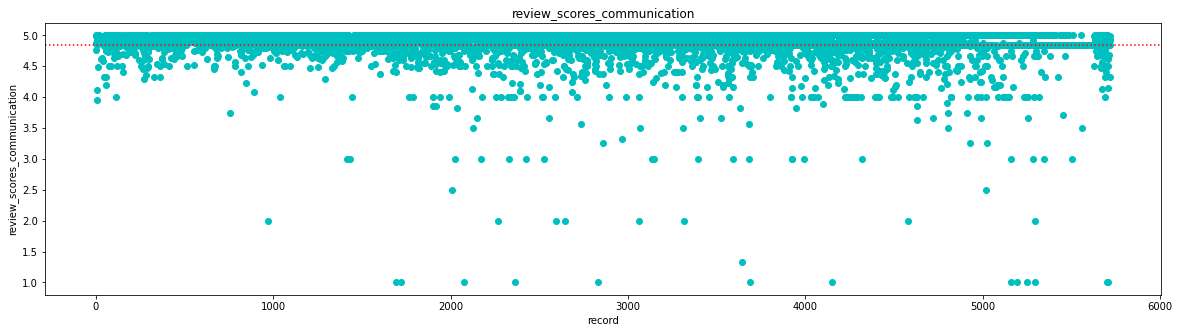

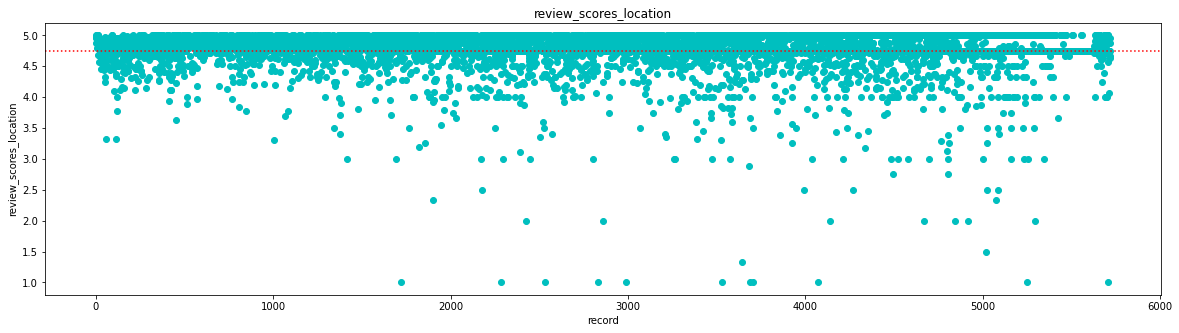

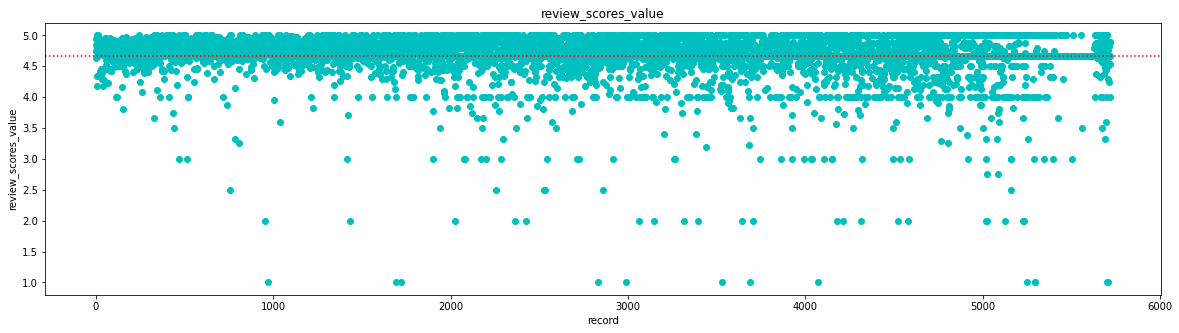

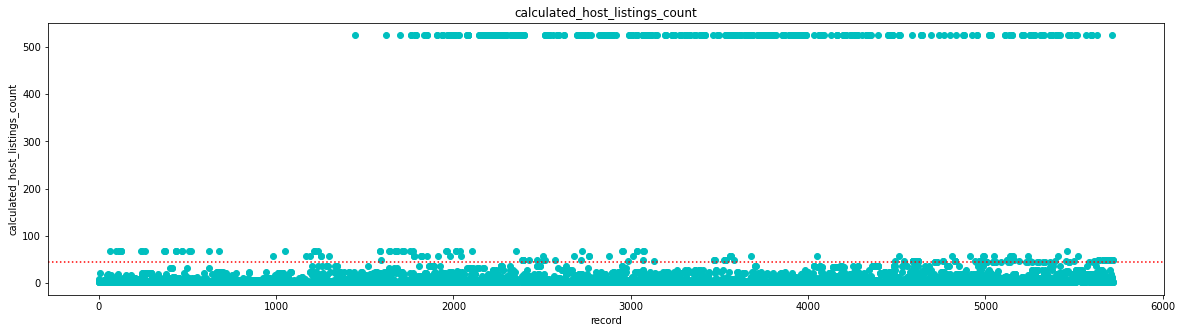

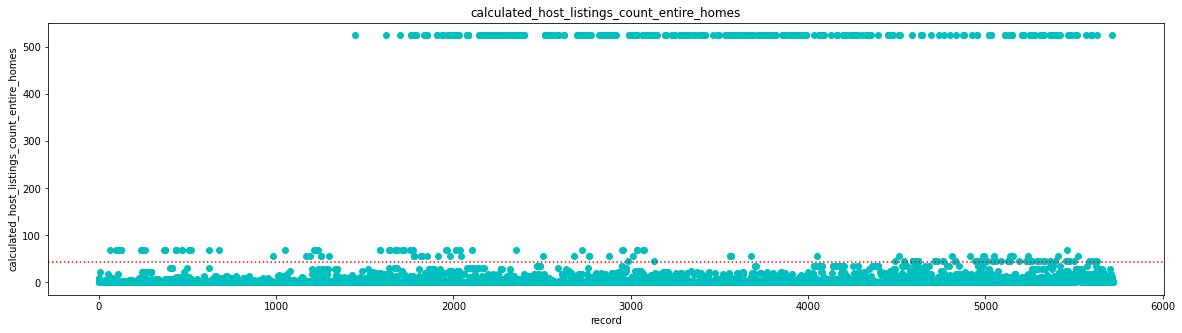

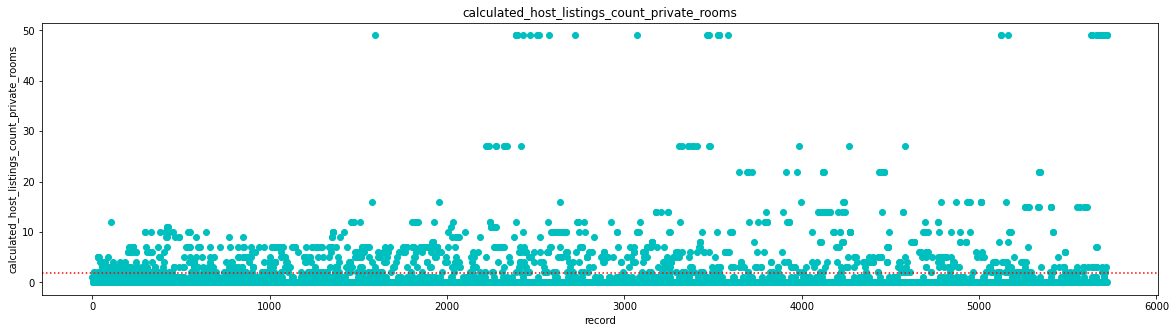

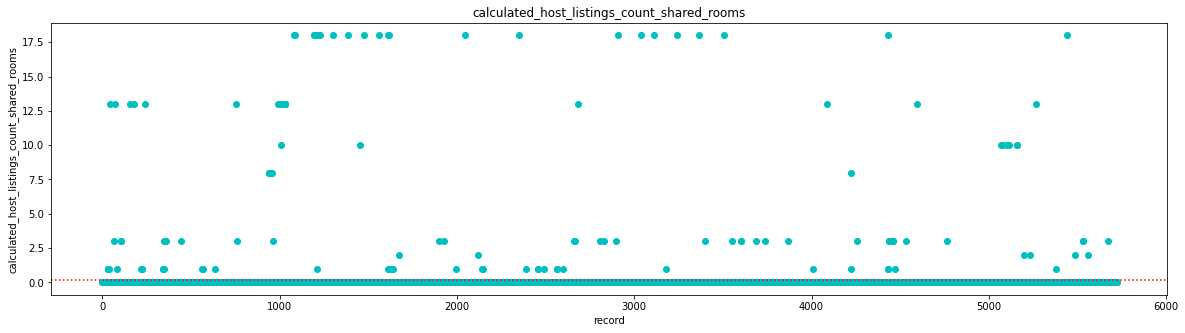

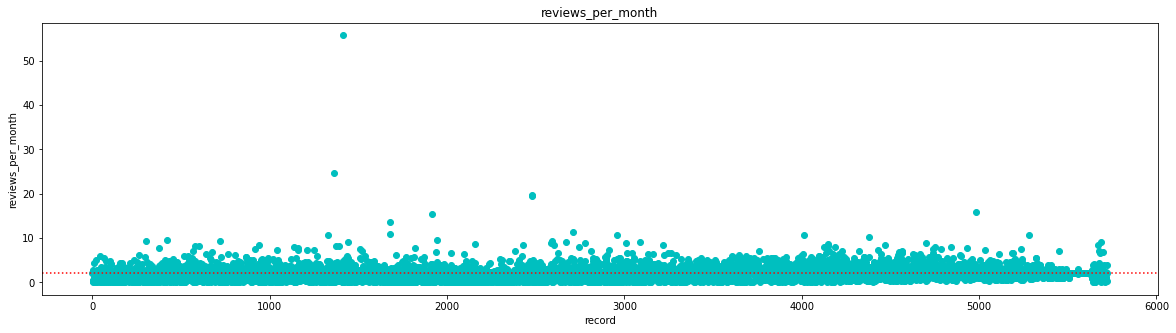

In [157]:
num_columns = [x for x in num_columns if x not in ['id','scrape_id','host_id'] ]

def plot(cols_to_plot): 
    c = np.random.randint(0, 255, 50)
    plt.figure(figsize=(20,5))
    plt.scatter(range(len(data_frame)),data_frame[cols_to_plot],c='c')
    plt.axhline(y=data_frame.describe().at['mean', cols_to_plot],color='r', linestyle='dotted')
    plt.ylabel(f'{cols_to_plot}')
    plt.xlabel('record')
    plt.title(f'{cols_to_plot}')
    plt.show()

for col in num_columns:
    plot(col)

Using the quartile method to remove outliers in the columns: price, minimum_nights, minimum_minimum_nights, maximum_maximum_nights, reviews_per_month

In [158]:
columns_to_clean = ['price', 'minimum_nights', 'minimum_minimum_nights', 'maximum_maximum_nights', 'reviews_per_month']

def remove_outliers(col):
    global data_frame
    Q1 = data_frame.describe().at['25%', col]
    Q3 = data_frame.describe().at['75%', col]
    IQR = Q3 - Q1
    data_frame = data_frame[(data_frame[col] > Q1 - 1.5 * IQR) & (data_frame[col] < Q3 + 1.5 * IQR)]

for col in columns_to_clean:
    remove_outliers(col)


Scatter plots of numeric columns after cleaning:

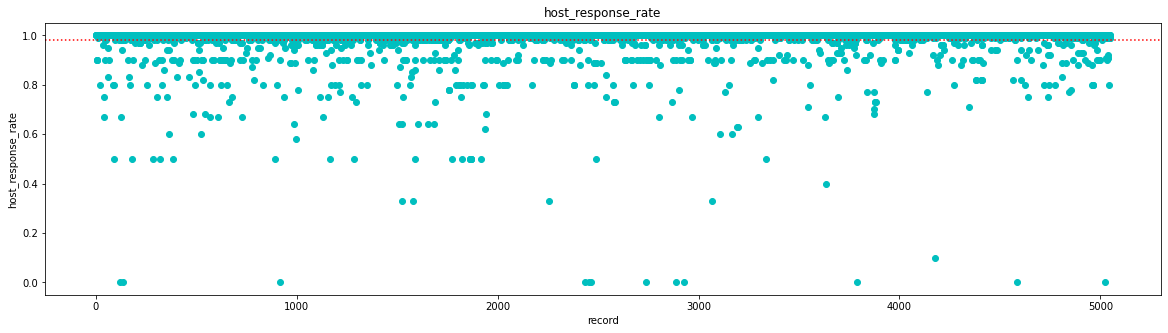

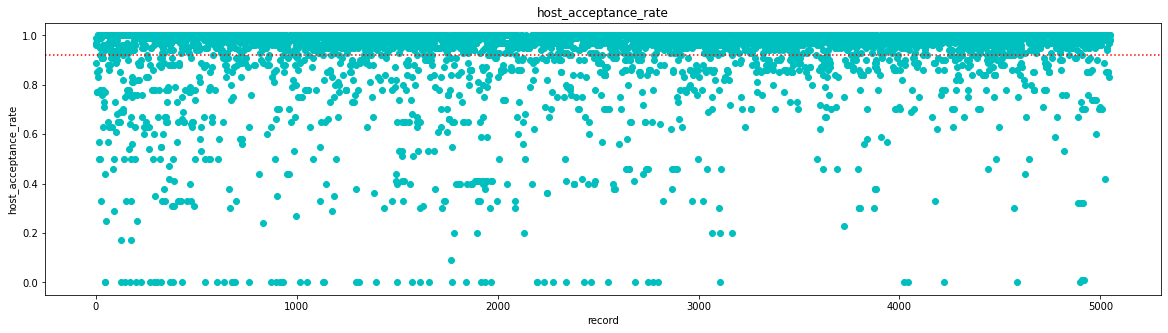

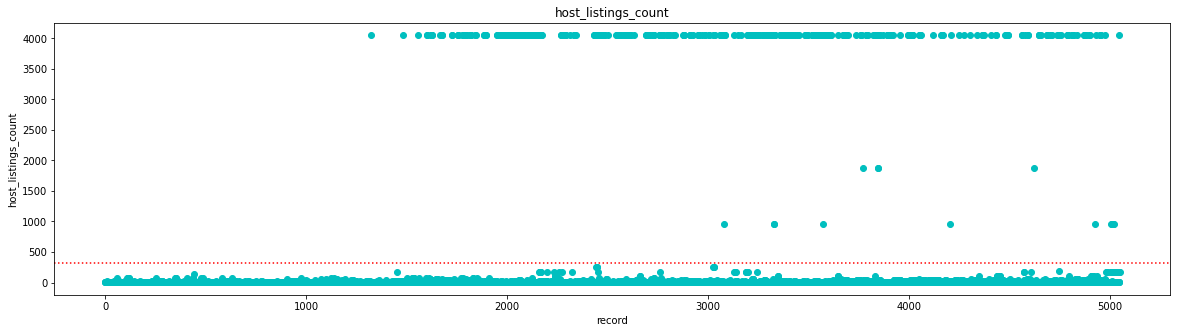

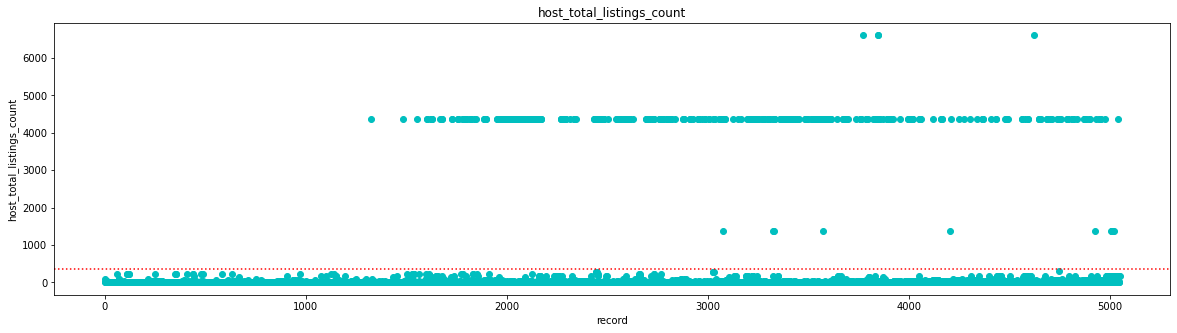

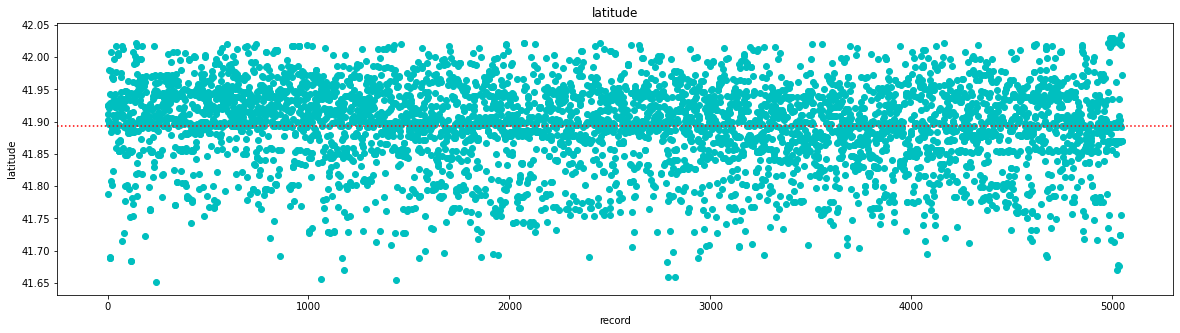

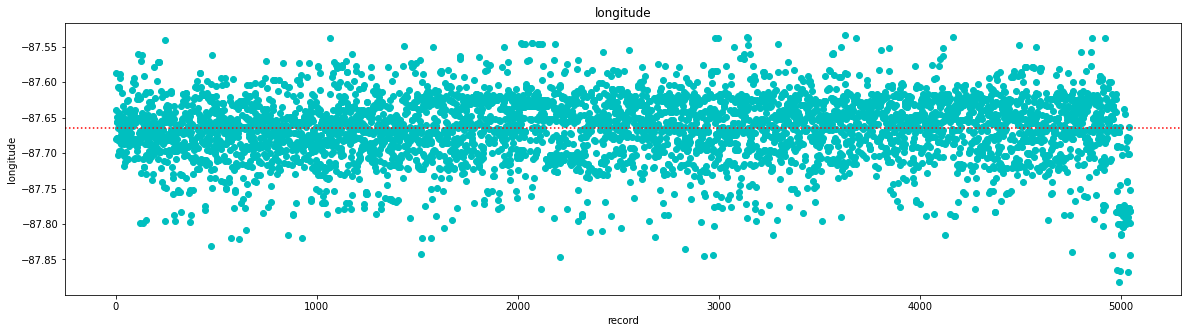

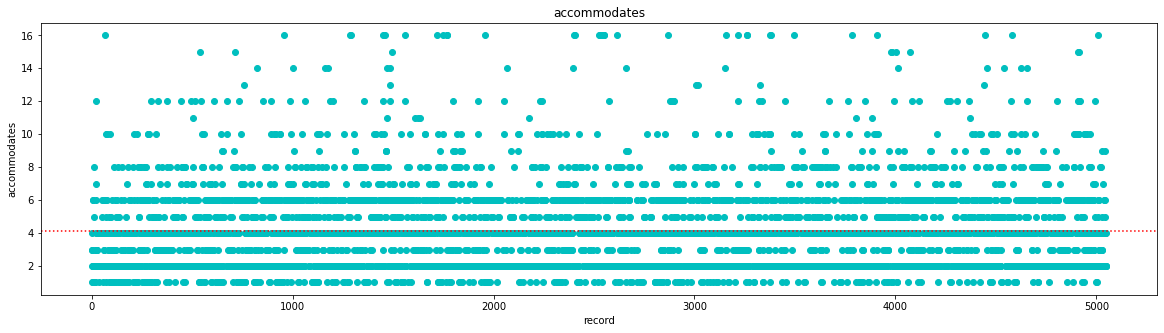

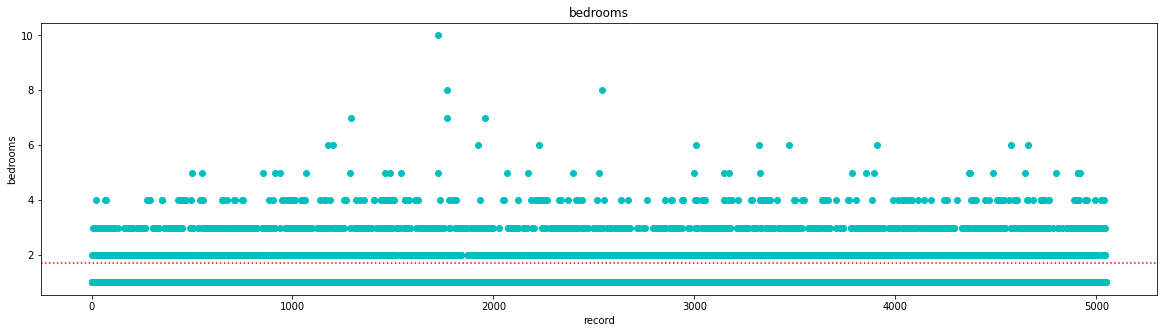

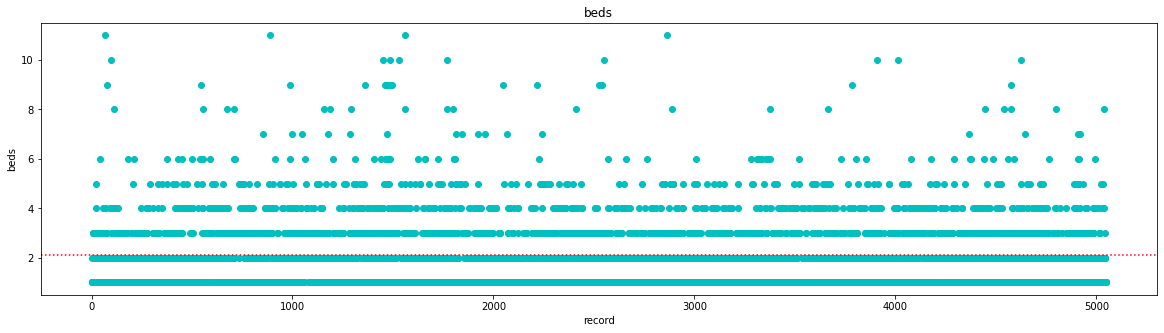

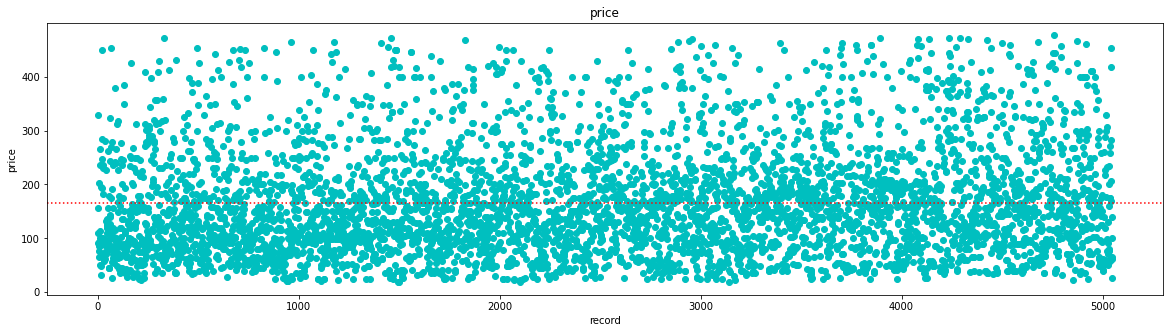

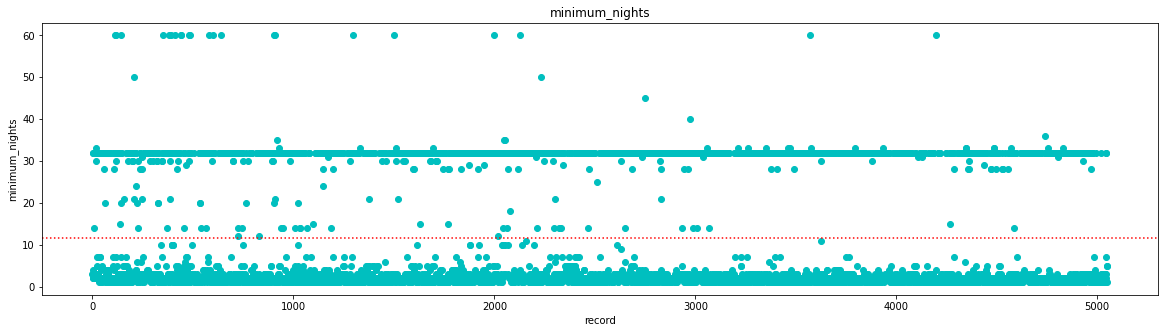

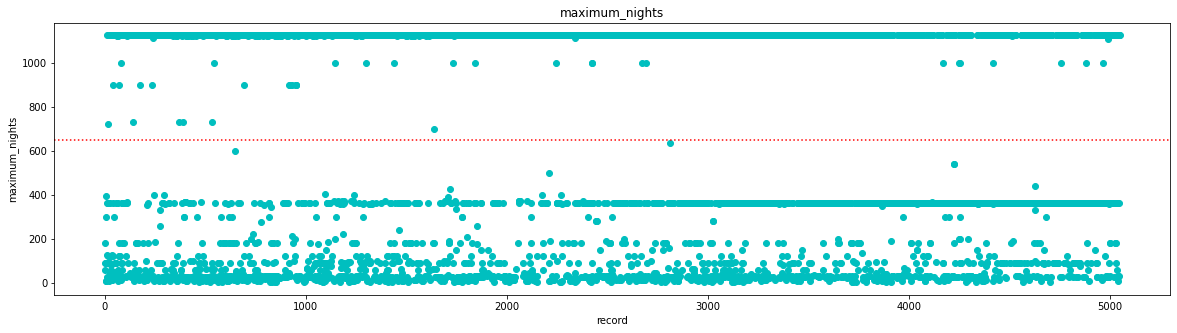

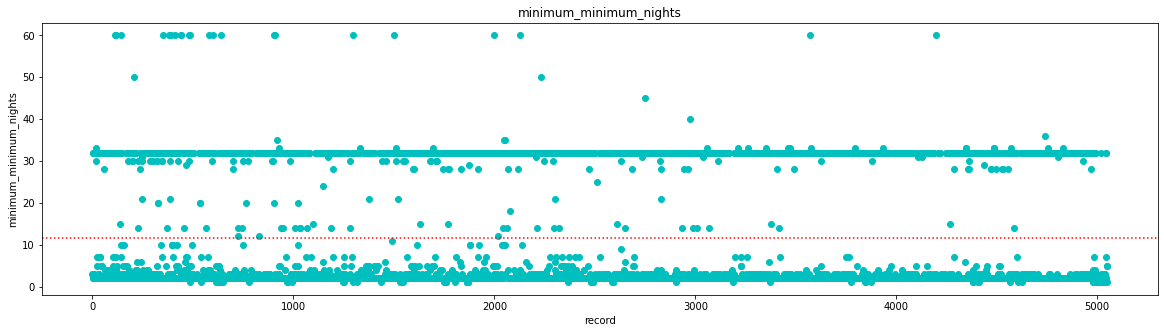

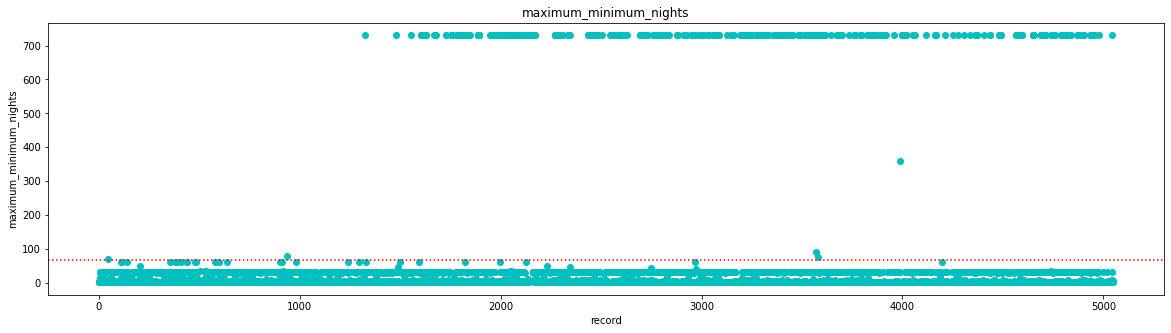

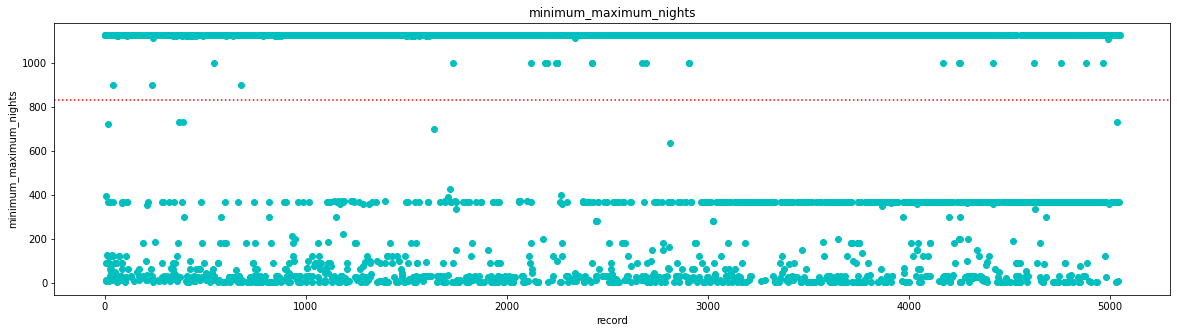

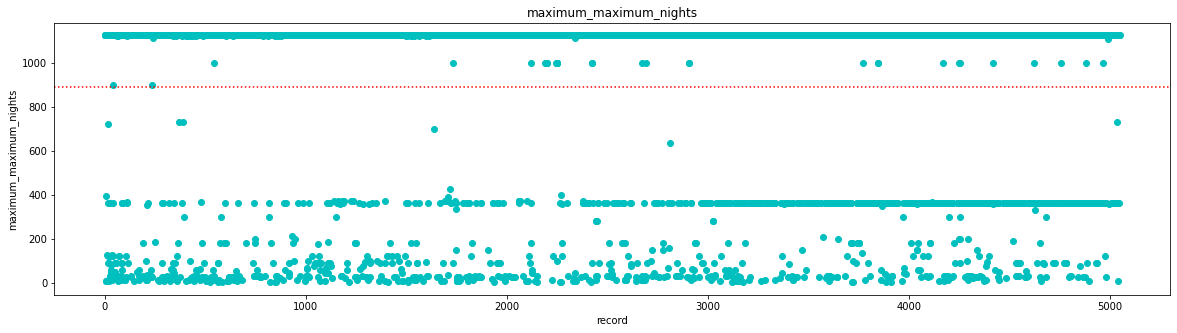

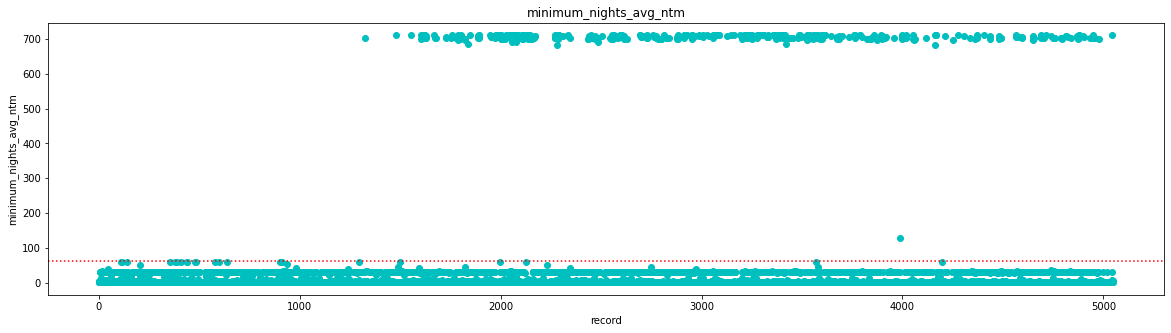

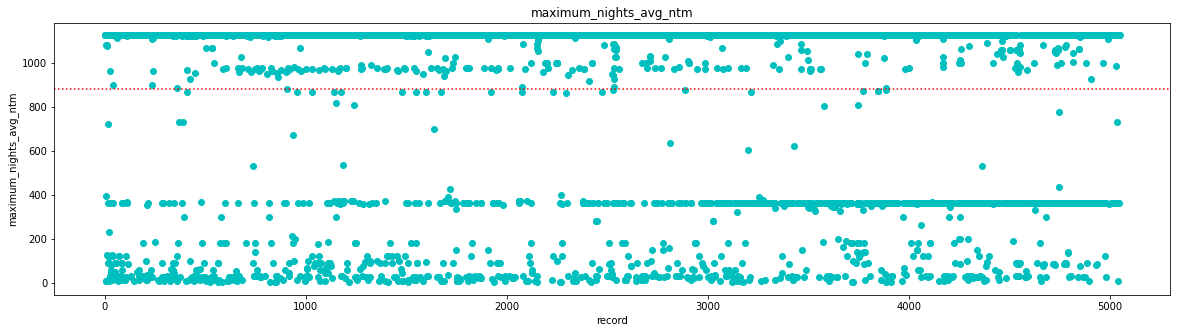

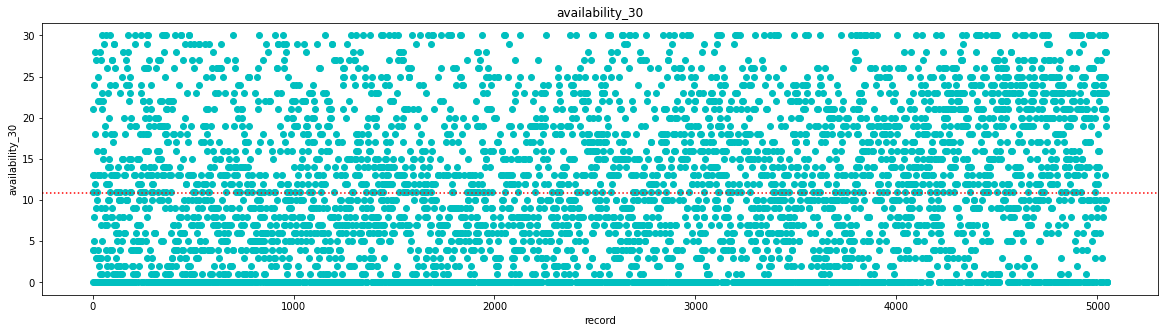

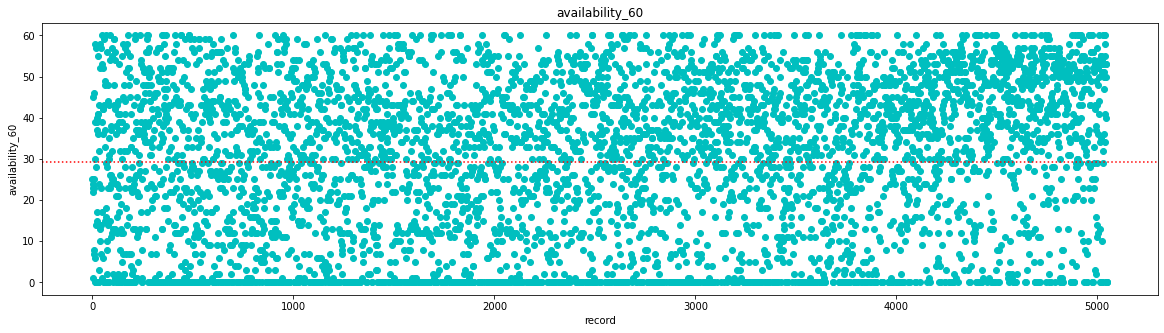

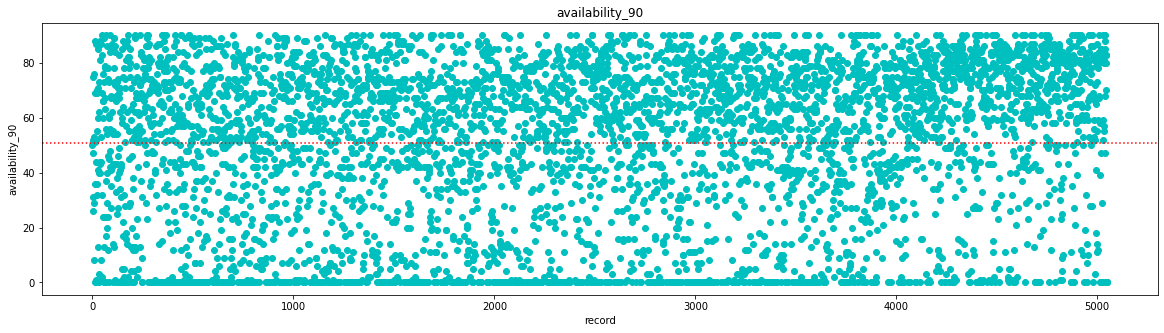

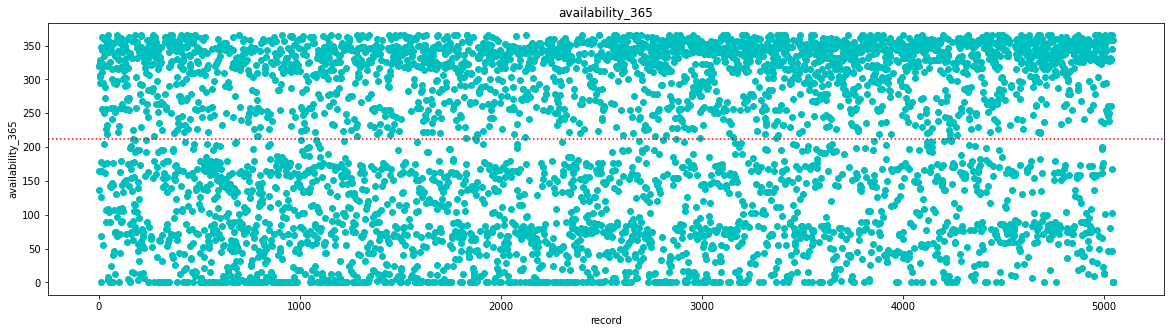

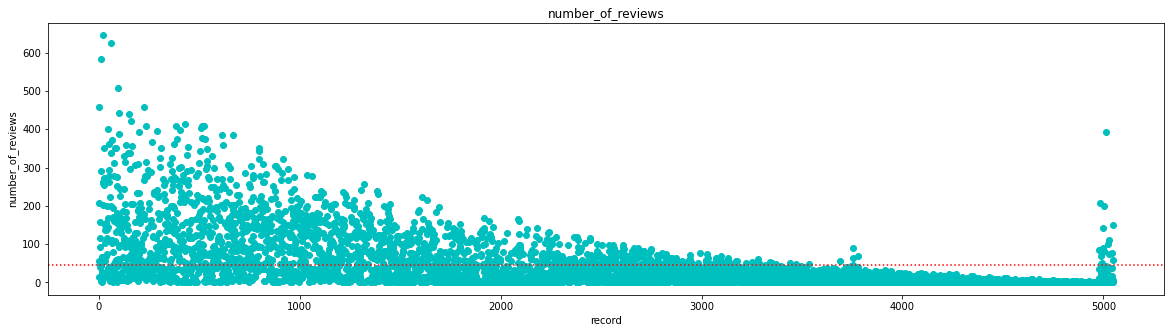

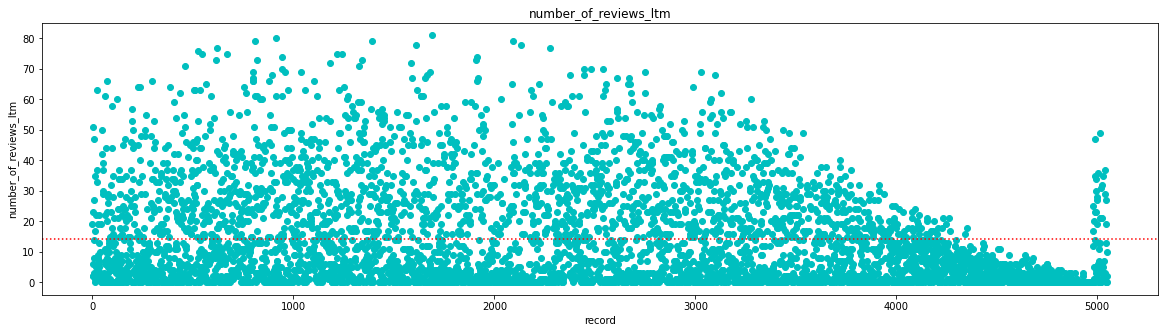

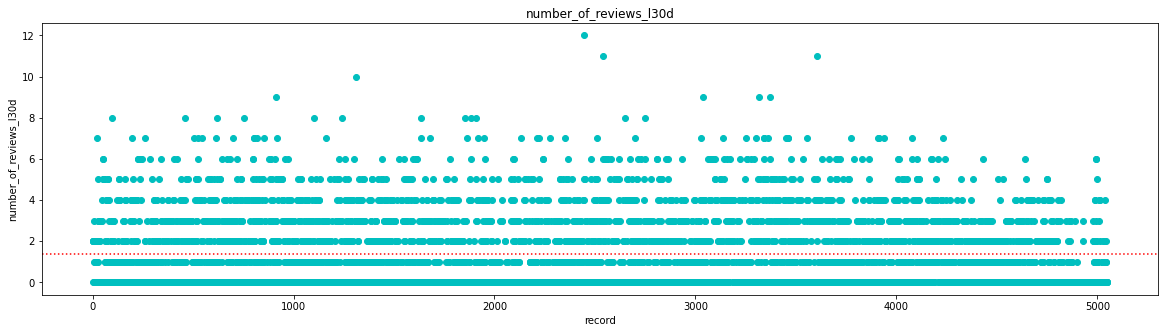

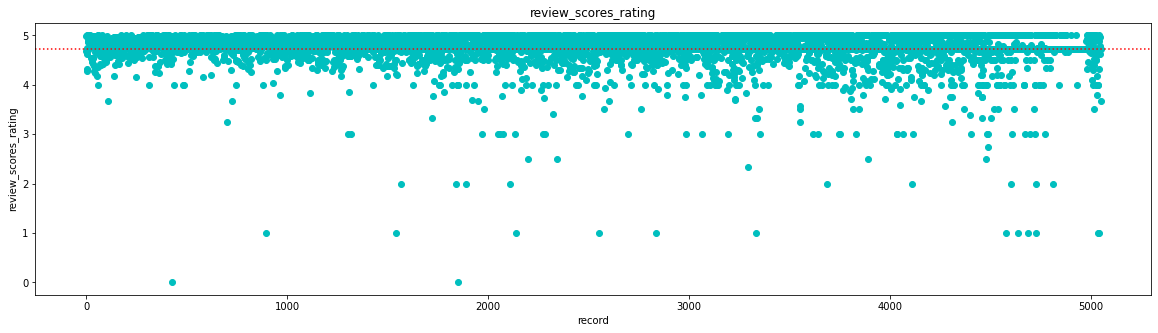

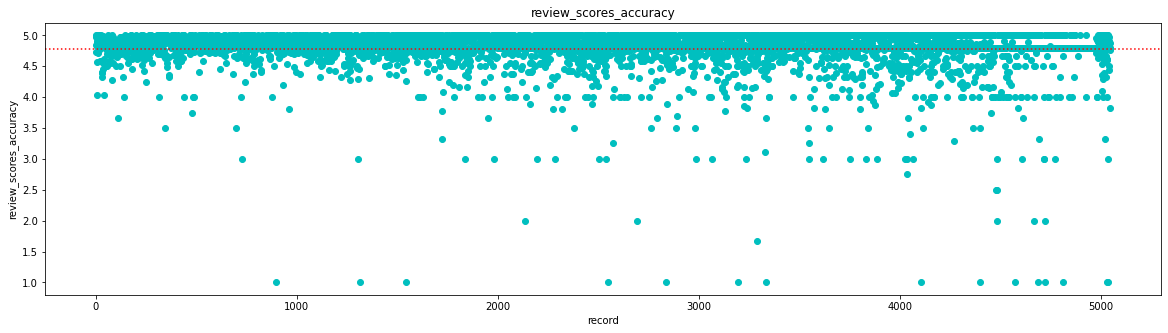

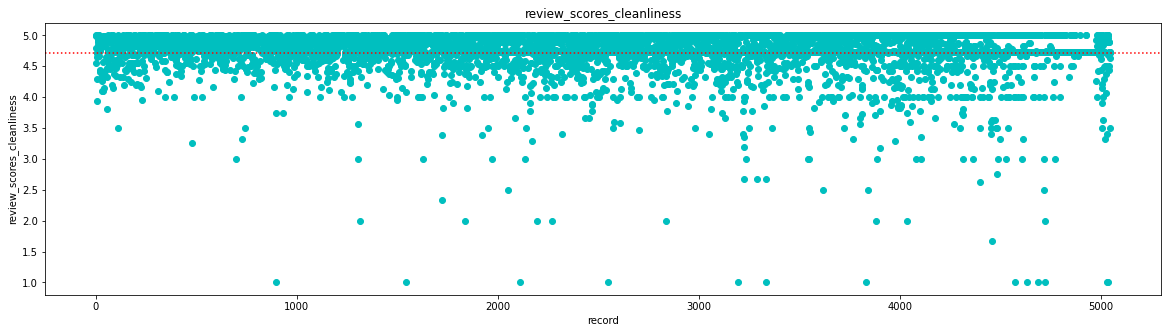

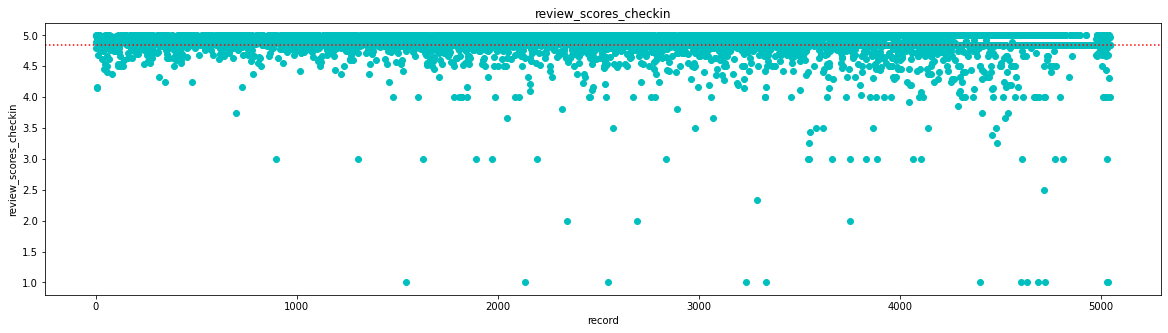

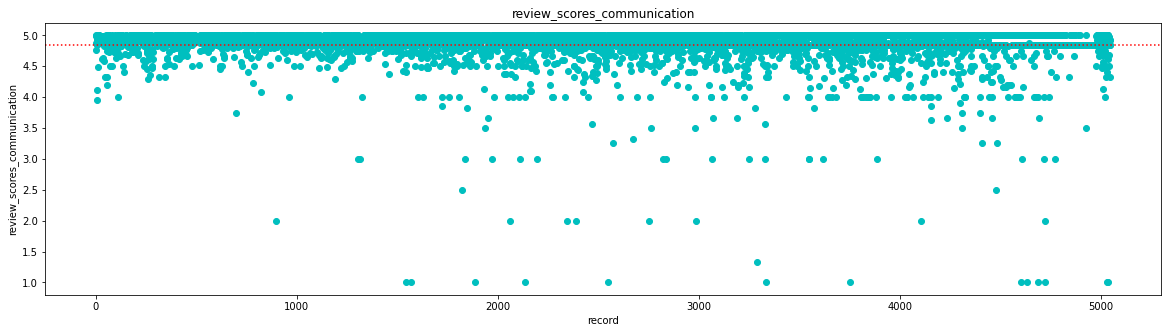

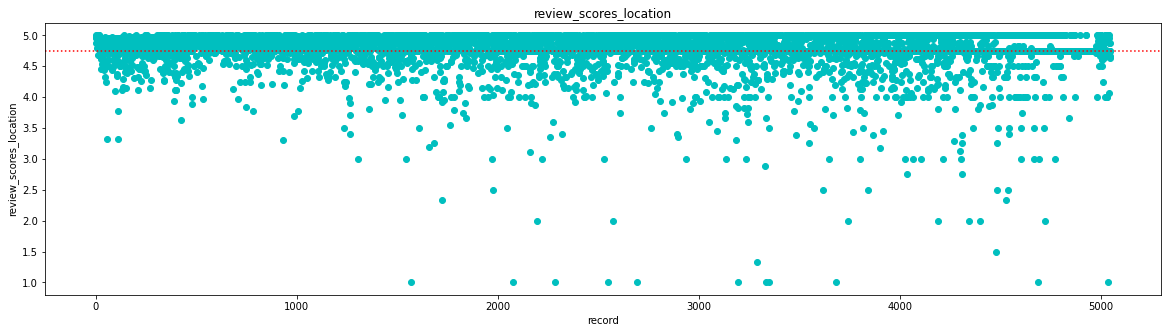

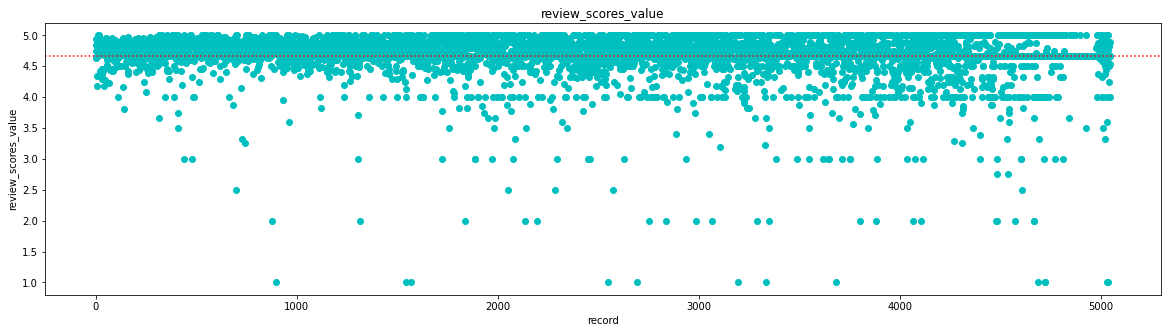

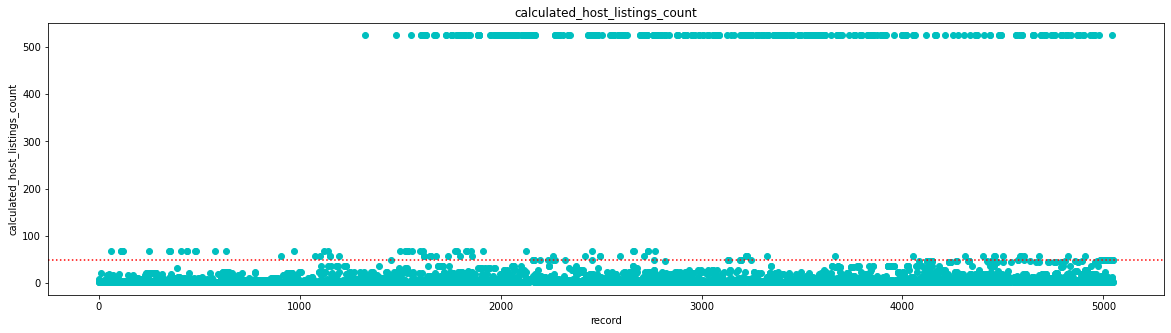

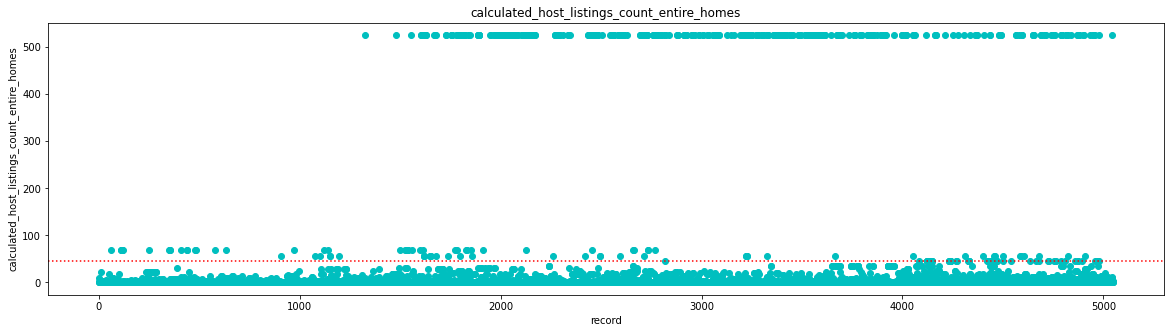

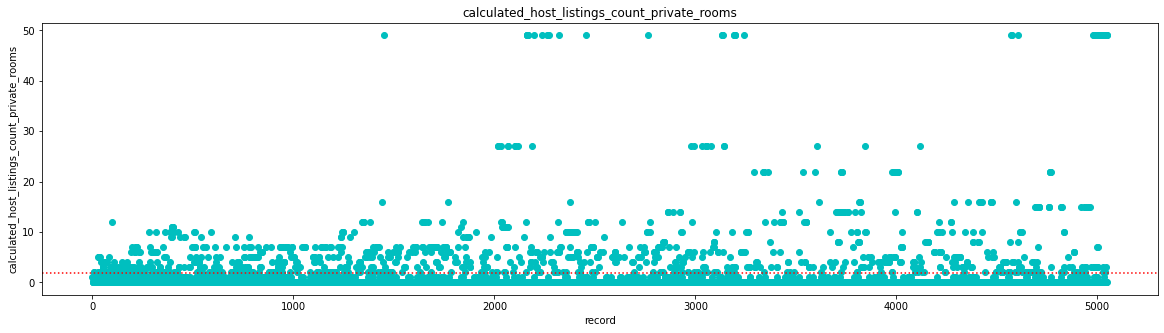

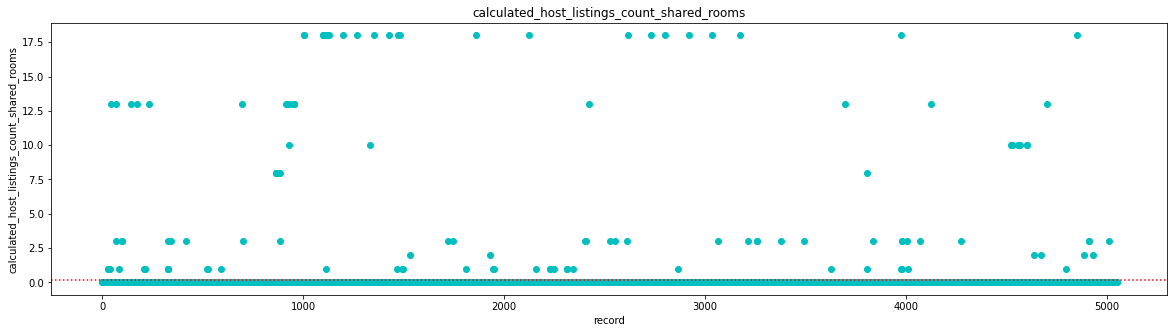

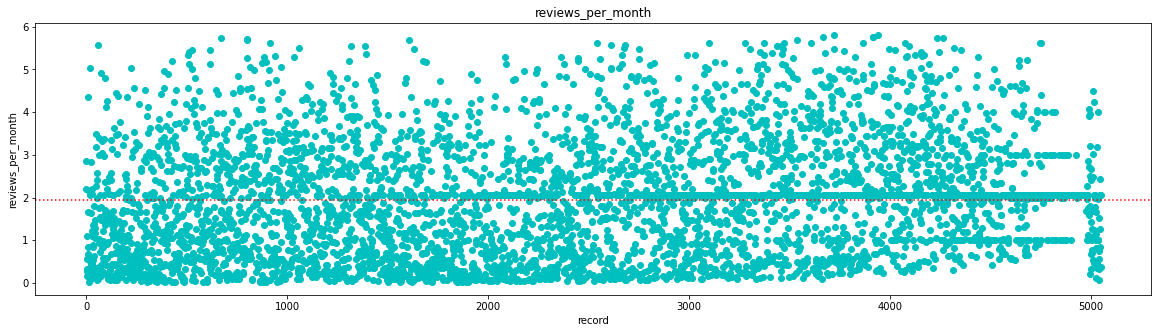

In [159]:
for col in num_columns:
    plot(col)

### Separation of the amenities column

For the purposes of further data preparation for machine learning models, we will separate the amenities column and place each of the values ​​there in separate columns. If the given value is present - True, if not - False.

In [160]:

#Removal of unnecessary characters and spaces from rows in the amenities column
data_frame.amenities = data_frame.amenities.apply(lambda x: x.replace('"',''))
data_frame.amenities = data_frame.amenities.apply(lambda x: x.replace('[',''))
data_frame.amenities = data_frame.amenities.apply(lambda x: x.replace(']',''))
data_frame.amenities = data_frame.amenities.apply(lambda x: x.replace(' ','_'))

amenities_list = []

for each in list(data_frame.amenities):
    amenities_list_elem = str(data_frame.amenities[0])
    amenities_list_elem = amenities_list_elem.split(',')
    amenities_list_elem = list(dict.fromkeys(amenities_list_elem))
    amenities_list.append(amenities_list_elem)

amenities_list = amenities_list[0]
amenities_list

['Hot_water_kettle',
 '_Conditioner',
 '_Heating',
 '_Hot_water',
 '_Toaster_oven_oven',
 '_Paid_parking_garage_off_premises',
 '_Bathtub',
 '_Clothing_storage:_dresser_and_closet',
 '_Dishes_and_silverware',
 '_Microwave',
 '_Cleaning_before_checkout',
 '_Cooking_basics',
 '_Cleaning_products',
 '_Host_greets_you',
 '_Dining_table',
 '_Bed_linens',
 '_Refrigerator',
 '_Hair_dryer',
 '_Essentials',
 '_Window_AC_unit',
 '_Hangers',
 '_32\\_HDTV_with_Amazon_Prime_Video',
 '_Chromecast',
 '_Netflix',
 '_Coffee_maker',
 '_Toaster',
 '_Kitchen',
 '_Paid_washer_\\u2013_In_building',
 '_Fast_wifi_\\u2013_176_Mbps',
 '_Wine_glasses',
 '_Paid_dryer_\\u2013_In_building',
 '_Piano',
 '_Smoke_alarm',
 '_Fire_extinguisher',
 '_Dr_Bronner\\u2019s_Pure_Castile__body_soap',
 '_Keurig_coffee_machine',
 '_Iron',
 '_Free_street_parking',
 '_First_aid_kit',
 '_Dedicated_workspace',
 '_Long_term_stays_allowed',
 '_Baking_sheet',
 '_Shower_gel',
 '_Carbon_monoxide_alarm',
 '_Portable_fans',
 '_Extra_pillows

In [161]:
def separateAmenities(record):
  '''Slice each string from column `amenities`into a separate column, 
  add label True or False depending if available or not.

  Args:
    record (str): The string to look up for in each row.
  '''
  data_frame[f"{record}"] = ''
  for index, row in data_frame.iterrows():
    if f'{record}' in row.amenities:
      data_frame.at[index, f'{record}'] = True
    else:
      data_frame.at[index, f'{record}'] = False
    
def changeType(record):
  '''Change data type for columns with separated amenities to bool.
  
  Args:
    record (str): The string with column name.
  '''
  data_frame[f'{record}'] = data_frame[f'{record}'].astype(bool)
  

for each in amenities_list:
  separateAmenities(each)
  changeType(each)

## Data visualization

In [162]:
int_columns = [*data_frame.select_dtypes(include=['int'])]
float_columns = [*data_frame.select_dtypes(include=['float'])]
object_columns = [*data_frame.select_dtypes(include=['object'])]

### New object column histograms

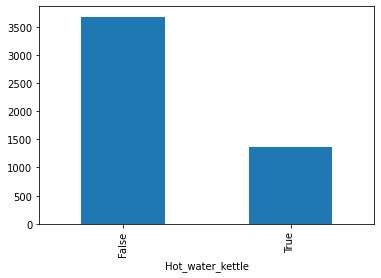

Summary for: Hot_water_kettle





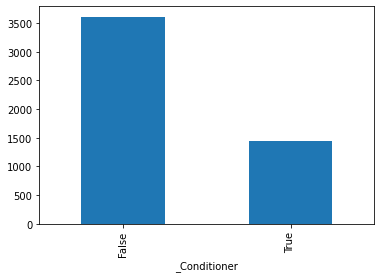

Summary for: _Conditioner





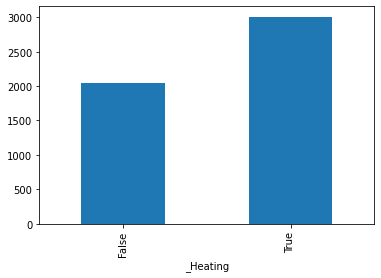

Summary for: _Heating





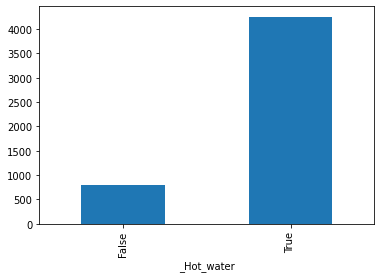

Summary for: _Hot_water





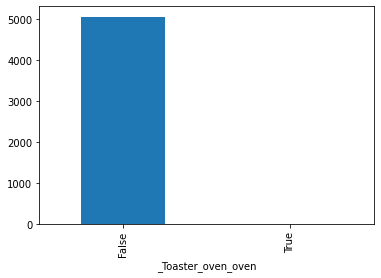

Summary for: _Toaster_oven_oven





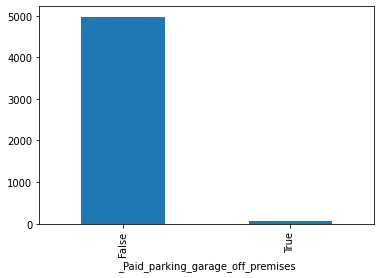

Summary for: _Paid_parking_garage_off_premises





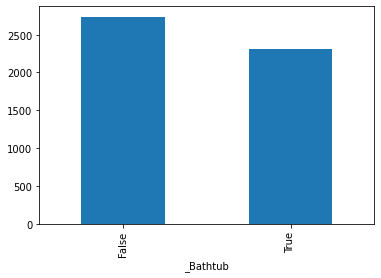

Summary for: _Bathtub





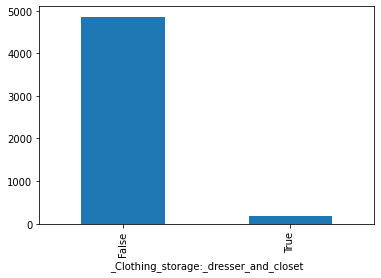

Summary for: _Clothing_storage:_dresser_and_closet





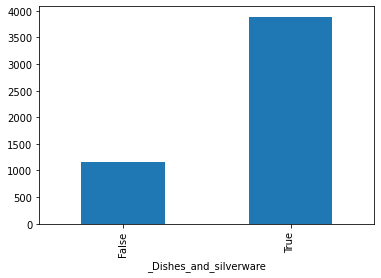

Summary for: _Dishes_and_silverware





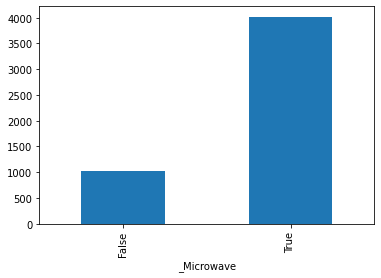

Summary for: _Microwave





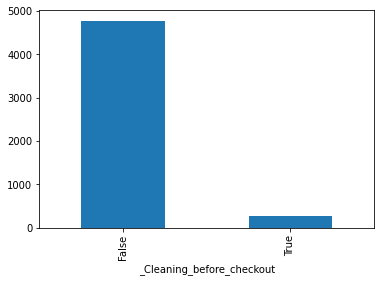

Summary for: _Cleaning_before_checkout





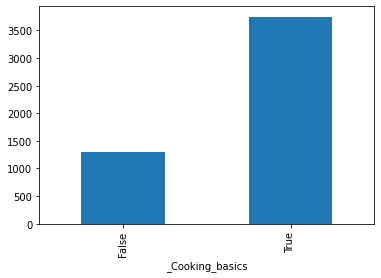

Summary for: _Cooking_basics





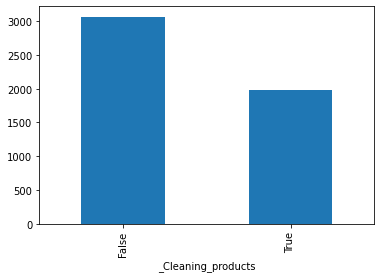

Summary for: _Cleaning_products





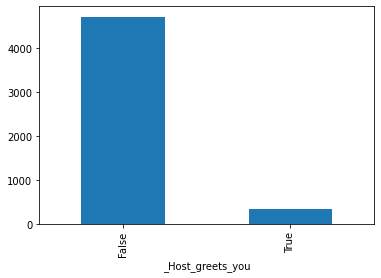

Summary for: _Host_greets_you





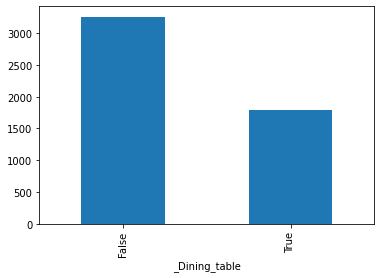

Summary for: _Dining_table





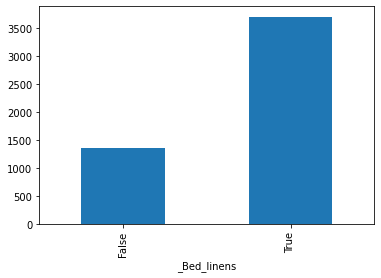

Summary for: _Bed_linens





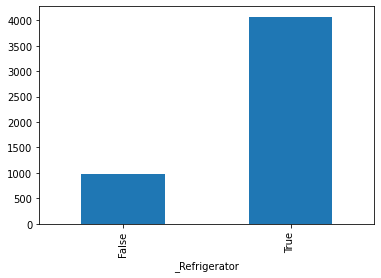

Summary for: _Refrigerator





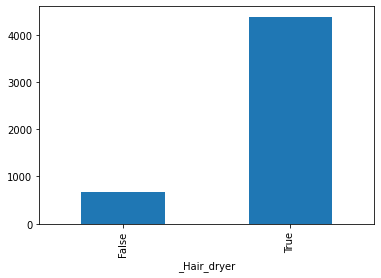

Summary for: _Hair_dryer





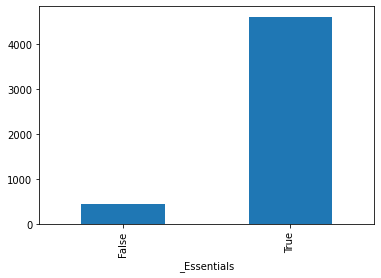

Summary for: _Essentials





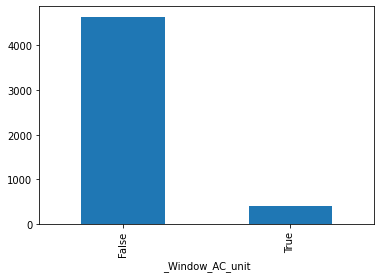

Summary for: _Window_AC_unit





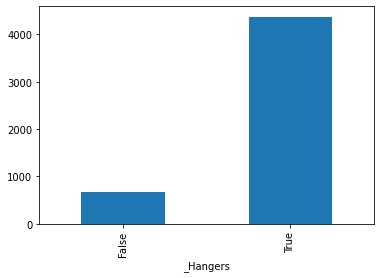

Summary for: _Hangers





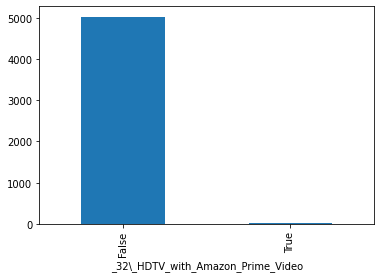

Summary for: _32\_HDTV_with_Amazon_Prime_Video





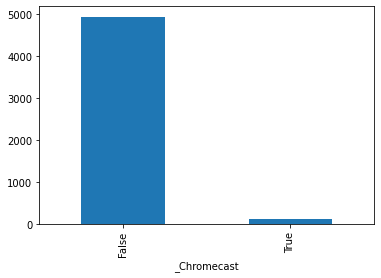

Summary for: _Chromecast





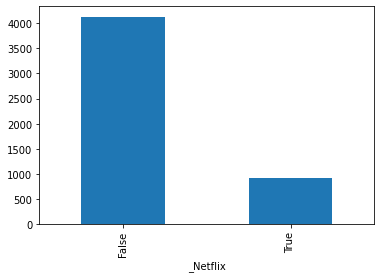

Summary for: _Netflix





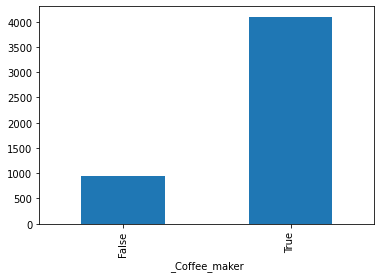

Summary for: _Coffee_maker





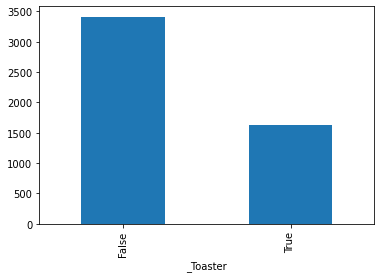

Summary for: _Toaster





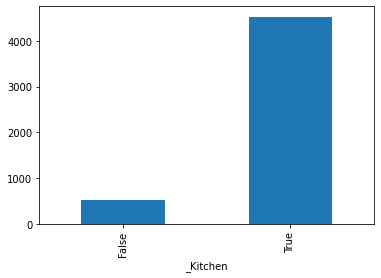

Summary for: _Kitchen





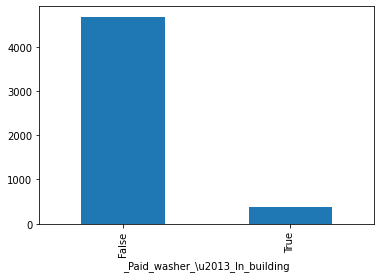

Summary for: _Paid_washer_\u2013_In_building





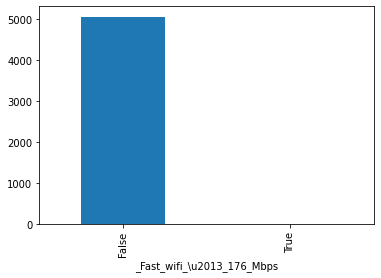

Summary for: _Fast_wifi_\u2013_176_Mbps





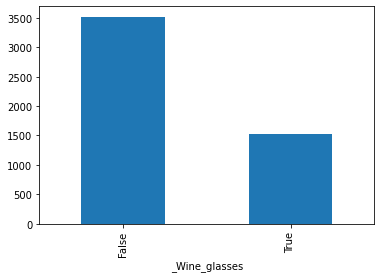

Summary for: _Wine_glasses





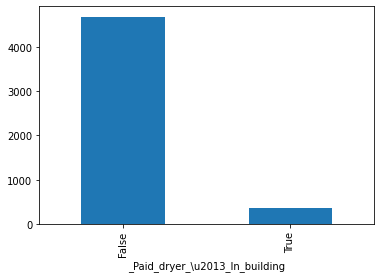

Summary for: _Paid_dryer_\u2013_In_building





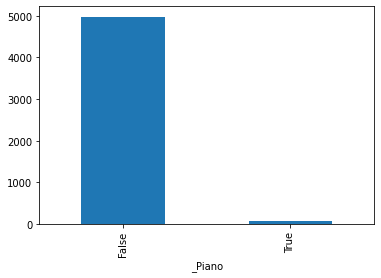

Summary for: _Piano





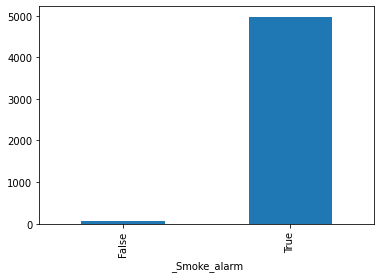

Summary for: _Smoke_alarm





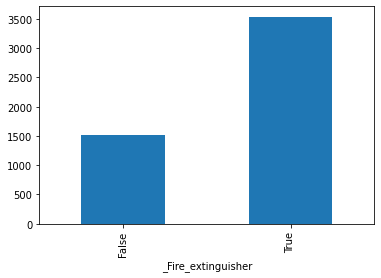

Summary for: _Fire_extinguisher





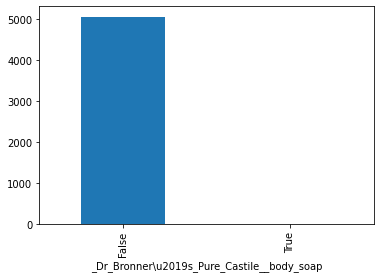

Summary for: _Dr_Bronner\u2019s_Pure_Castile__body_soap





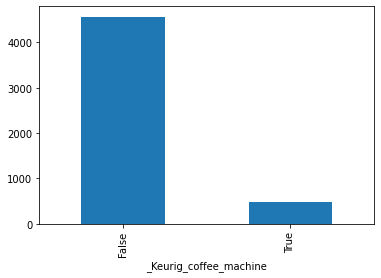

Summary for: _Keurig_coffee_machine





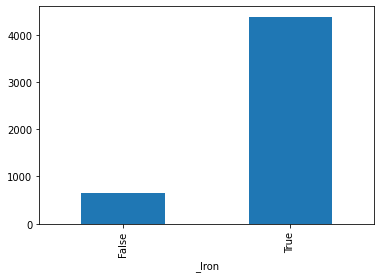

Summary for: _Iron





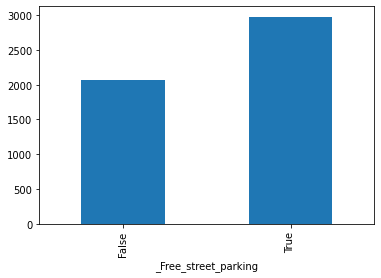

Summary for: _Free_street_parking





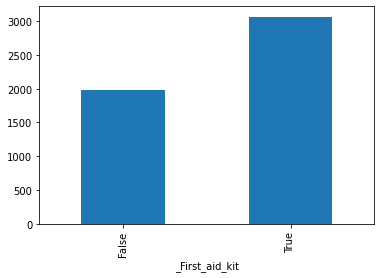

Summary for: _First_aid_kit





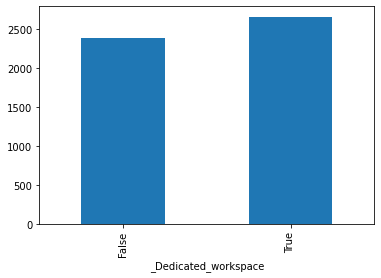

Summary for: _Dedicated_workspace





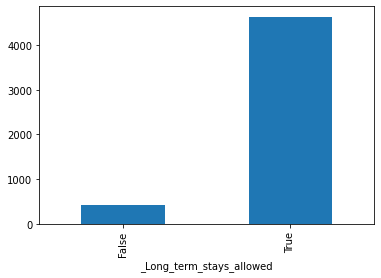

Summary for: _Long_term_stays_allowed





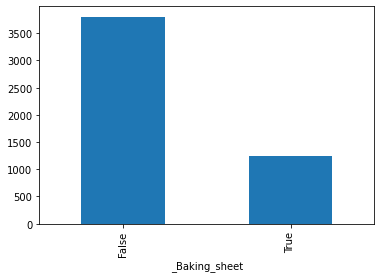

Summary for: _Baking_sheet





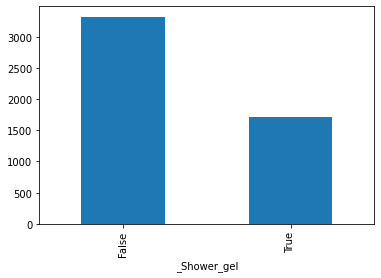

Summary for: _Shower_gel





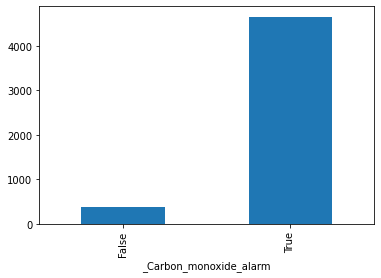

Summary for: _Carbon_monoxide_alarm





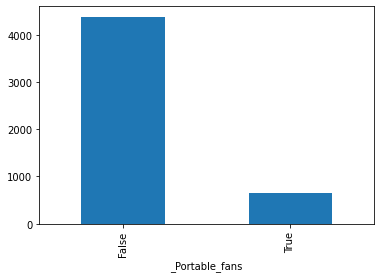

Summary for: _Portable_fans





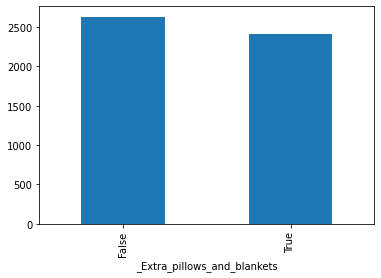

Summary for: _Extra_pillows_and_blankets





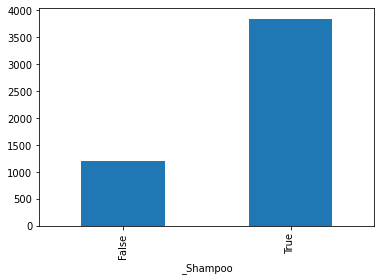

Summary for: _Shampoo





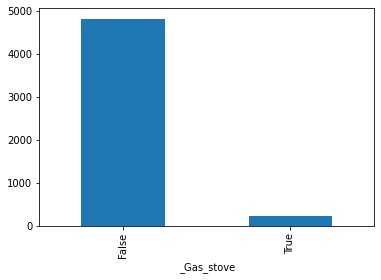

Summary for: _Gas_stove





In [163]:
def categorical_columns_summary(column):
    if len(data_frame[column].unique()) < 80:
        grouped = data_frame.groupby(column)[column].count()
        grouped.plot.bar()
        return plt.show()
    elif len(data_frame[column].unique()) > 300:
        pass
    else:
        result = data_frame.groupby(column)[column].count()
        print(result)
        return result

for col in amenities_list:
    result = categorical_columns_summary(col)
    print(f'Summary for: {col}'+'\n\n\n')

### Normal distribution with normalization for numeric columns

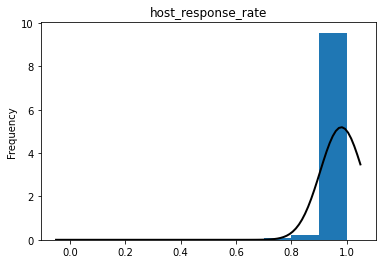

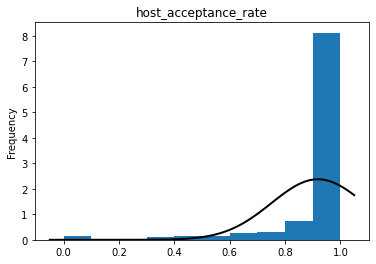

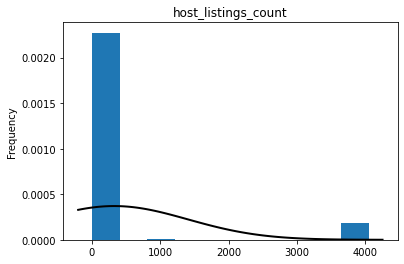

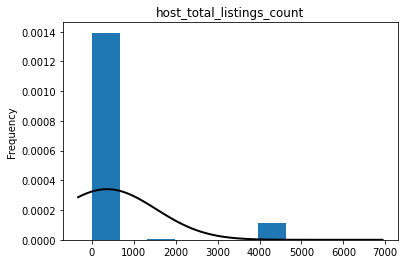

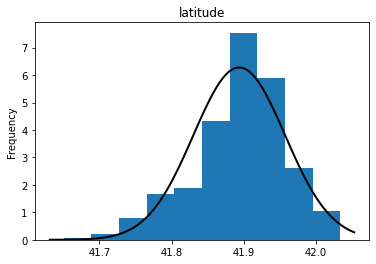

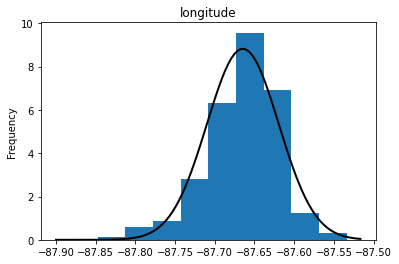

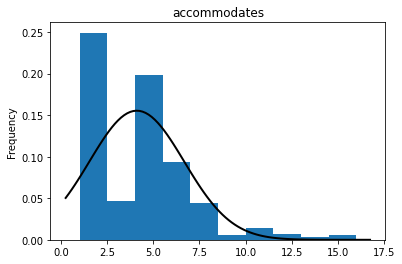

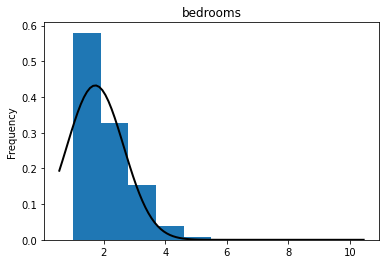

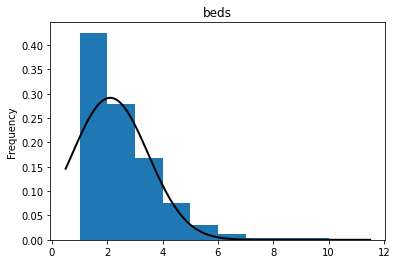

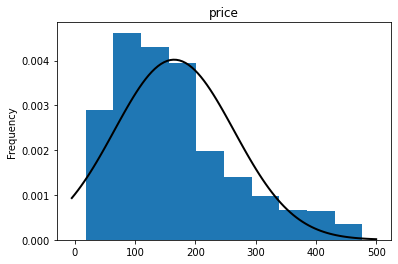

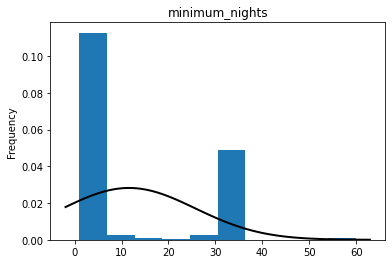

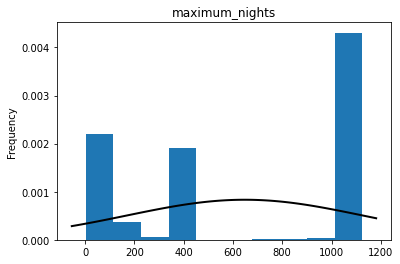

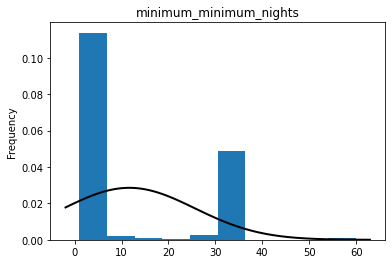

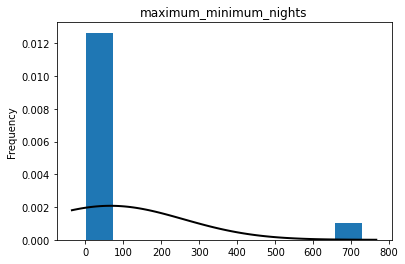

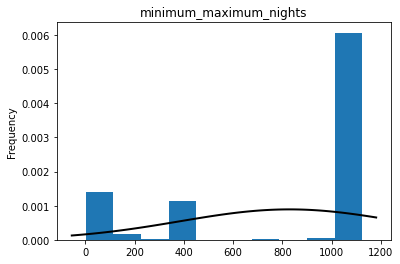

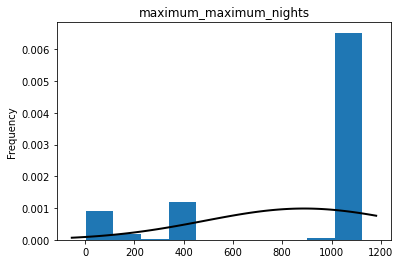

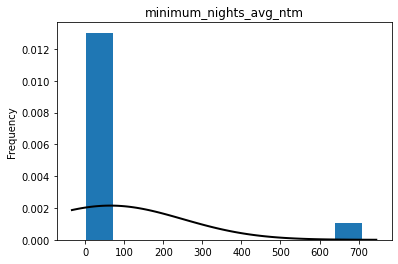

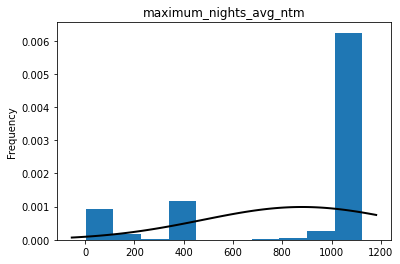

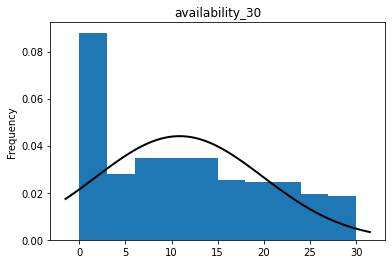

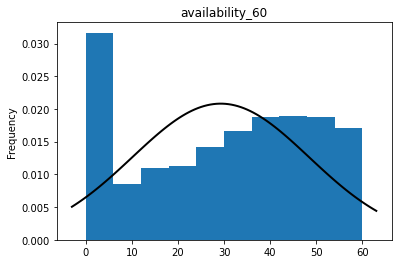

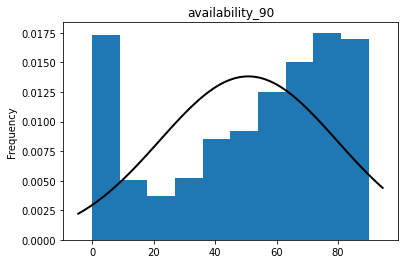

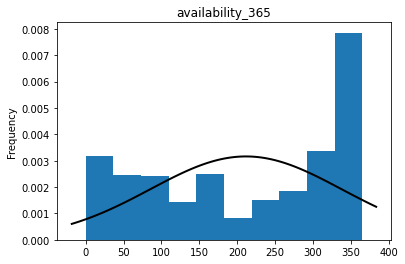

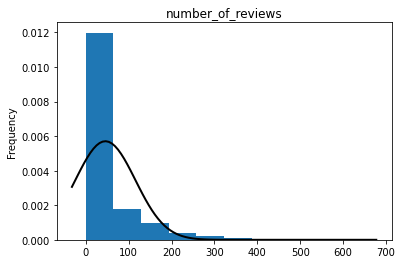

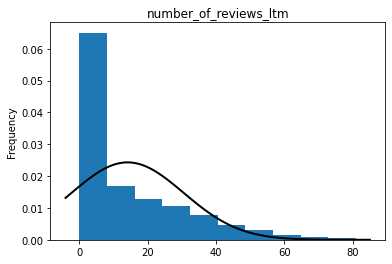

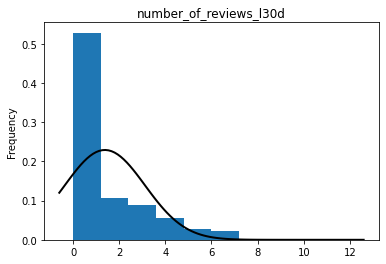

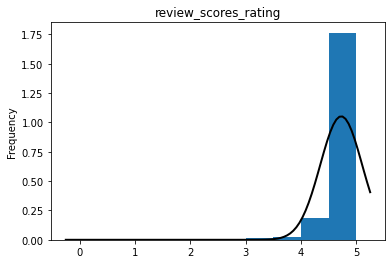

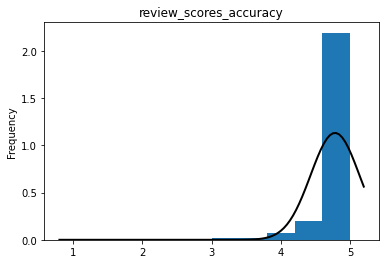

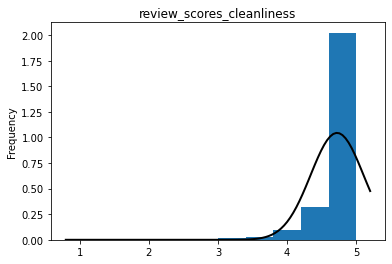

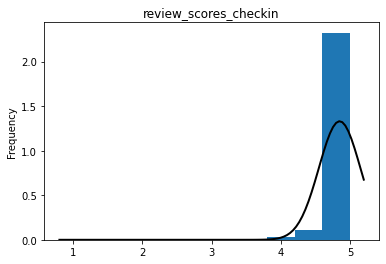

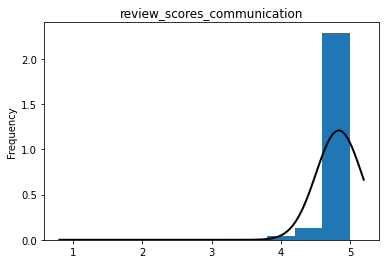

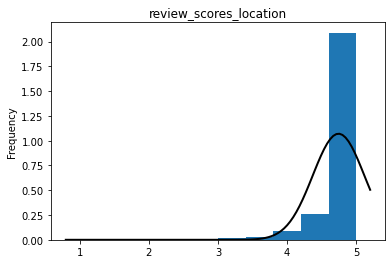

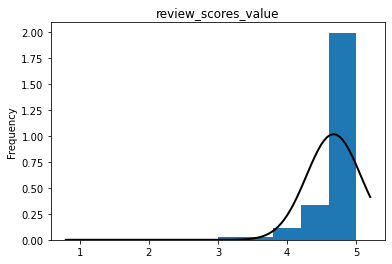

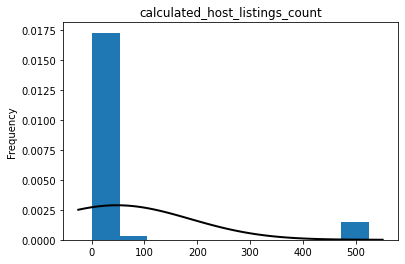

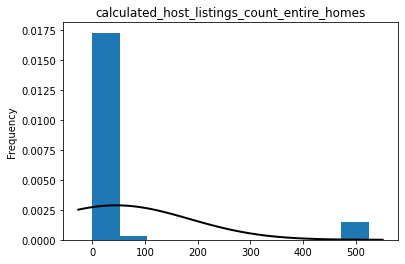

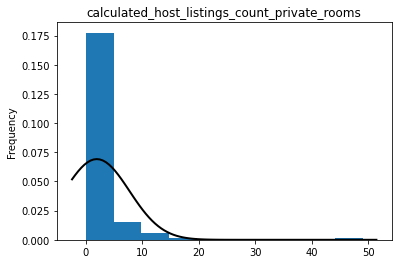

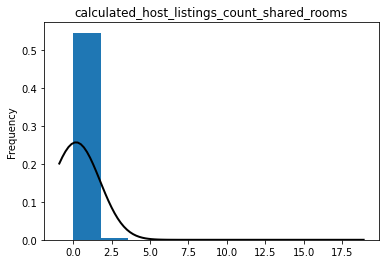

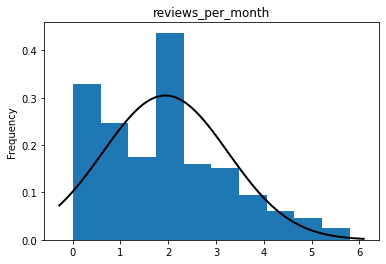

In [164]:
for col in num_columns:
    data_frame[col].plot.hist(density=True)
    mu, std = norm.fit(data_frame[col])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2,)
    plt.title(f'{col}')
    plt.show()

In [165]:
float_columns = [*data_frame.select_dtypes(include=['float'])]
int_columns = [*data_frame.select_dtypes(include=['int'])]

### Looking for correlations between float columns

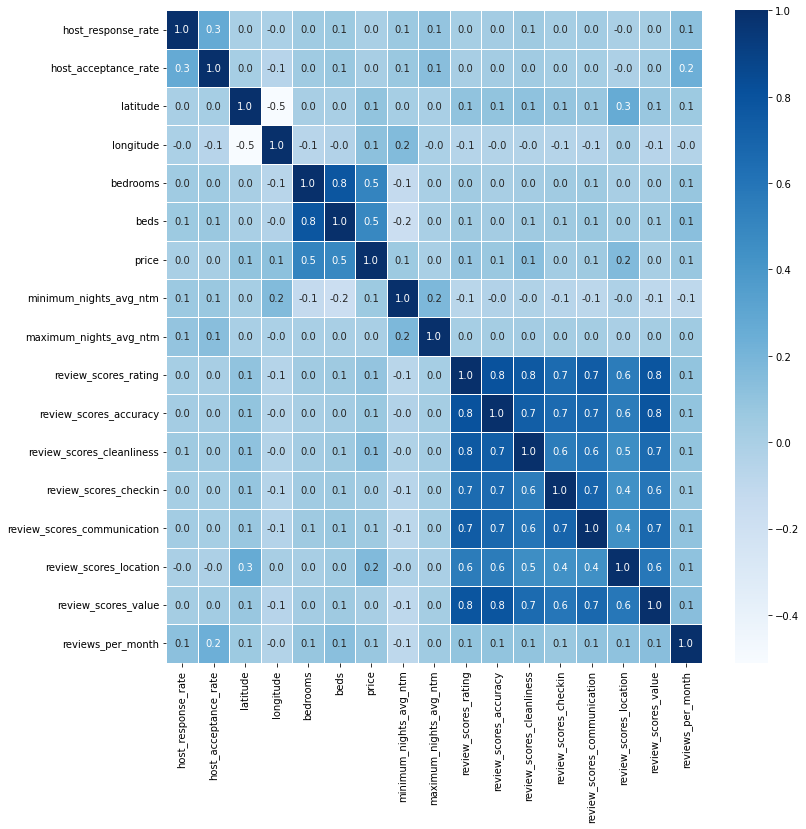

In [166]:
data_frame.corr()
float_columns_corr = data_frame.select_dtypes(include=['float'])
corr = float_columns_corr.corr()

plt.figure(figsize=(12,12))
sb.heatmap(corr, cmap="Blues", annot=True, fmt='.1f', linewidth=.5)
plt.show()

### Looking for correlations between integer columns

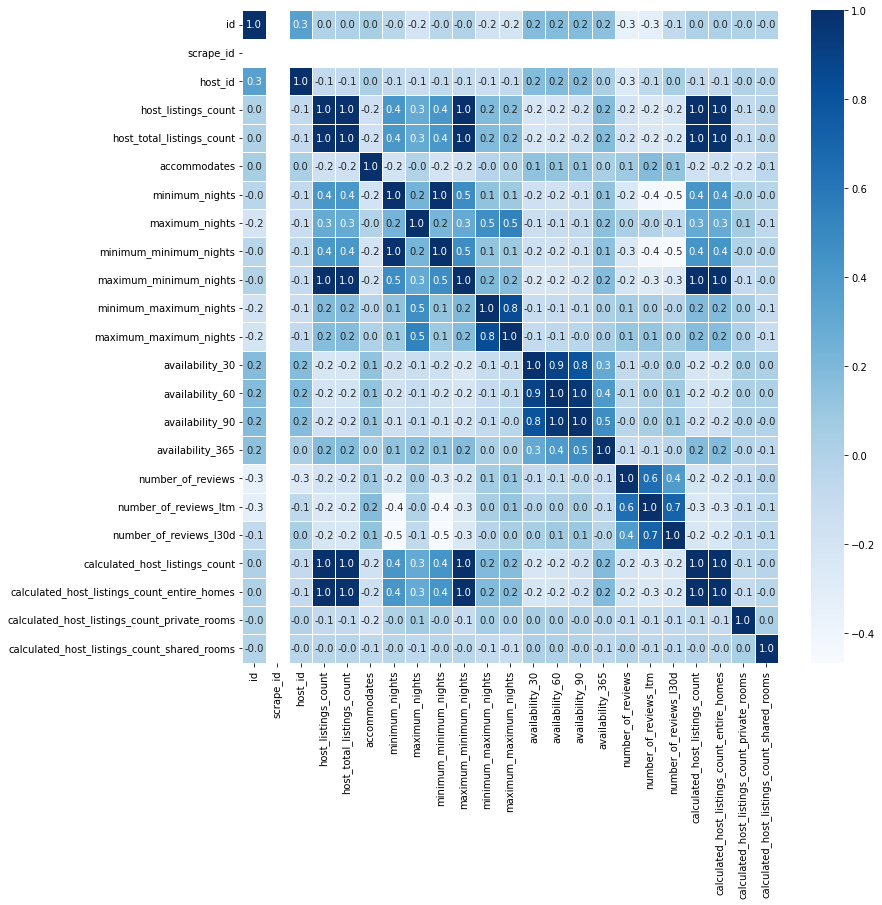

In [167]:
data_frame.corr()
int_columns_corr = data_frame.select_dtypes(include=['int'])
corr = int_columns_corr.corr()

plt.figure(figsize=(12,12))
sb.heatmap(corr, cmap="Blues", annot=True, fmt='.1f', linewidth=.5)
plt.show()